# EDA - basic info

Saving credit_card_default.csv to credit_card_default.csv
=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   ID                  30000 non-null  int64
 1   LIMIT_BAL           30000 non-null  int64
 2   SEX                 30000 non-null  int64
 3   EDUCATION           30000 non-null  int64
 4   MARRIAGE            30000 non-null  int64
 5   AGE                 30000 non-null  int64
 6   PAY_0               30000 non-null  int64
 7   PAY_2               30000 non-null  int64
 8   PAY_3               30000 non-null  int64
 9   PAY_4               30000 non-null  int64
 10  PAY_5               30000 non-null  int64
 11  PAY_6               30000 non-null  int64
 12  BILL_AMT1           30000 non-null  int64
 13  BILL_AMT2           30000 non-null  int64
 14  BILL_AMT3           30000 non-null  int64
 15  BILL_AMT4  

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0



=== Default_Next_Month Value Counts ===
default_next_month
0    23364
1     6636
Name: count, dtype: int64

✅ Label mapping applied:
default_next_month_label
Not Defaulted    23364
Defaulted         6636
Name: count, dtype: int64


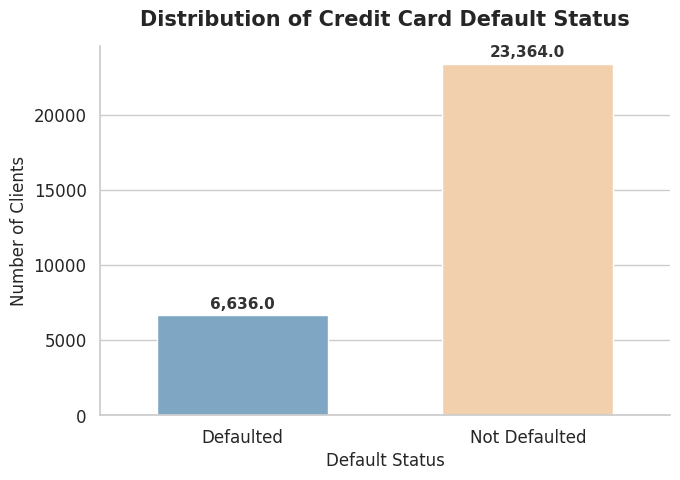

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0  ...          0          0         0       689         0         0   
1  ...       3455       3261         0      1000      1000      1000   
2  ...      14948      15549      1518      1500      1000      1000   
3  ...      28959      29547      2000      2019      1200      1100   
4  ...      19146      19131      2000     36681     10000      9000   

   PAY_AMT5  PAY_AMT6  default_next_month  default_next_month_label  
0         0         0 

In [ ]:
# ===============================================================
# 📂 Step 1: Import and Basic Exploration
# ===============================================================

import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()   # ⬅️ this opens a file-picker; select corporate_ratings_data.csv
# 1️⃣ Load the dataset
df = pd.read_csv("credit_card_default.csv")

# 2️⃣ Display dataset information
print("=== Data Info ===")
df.info()

# 3️⃣ Display the first few rows
print("\n=== Data Preview ===")
display(df.head())

# 4️⃣ Check target variable counts
print("\n=== Default_Next_Month Value Counts ===")
print(df["default_next_month"].value_counts())

# 5️⃣ Map labels to meanings (1 → Defaulted, 0 → Not Defaulted)
df["default_next_month_label"] = df["default_next_month"].map({1: "Defaulted", 0: "Not Defaulted"})

print("\n✅ Label mapping applied:")
print(df["default_next_month_label"].value_counts())

# ===============================================================
# 📊 Step 3 (Improved): Aesthetic Visualization of Target Variable
# ===============================================================

import matplotlib.pyplot as plt
import seaborn as sns

# Style and palette
sns.set_theme(style="whitegrid", font_scale=1.1)
custom_palette = ["#74A9CF", "#FDD0A2"]  # soft blue and light orange

plt.figure(figsize=(7, 5))
ax = sns.countplot(
    x="default_next_month_label",
    hue="default_next_month_label",
    data=df,
    palette=custom_palette,
    legend=False,
    width=0.6
)


# Title and labels
plt.title("Distribution of Credit Card Default Status", fontsize=15, weight="bold", pad=15)
plt.xlabel("Default Status", fontsize=12)
plt.ylabel("Number of Clients", fontsize=12)

# Annotate each bar neatly above its center
for container in ax.containers:
    ax.bar_label(
        container,
        fmt="{:,}",  # comma thousands
        label_type="edge",
        fontsize=11,
        weight="bold",
        padding=3,
        color="#333333"
    )

# Remove top/right spines and adjust layout
sns.despine()
plt.tight_layout()
plt.show()

print(df.head(5))

# ===============================================================
# 🔍 Unique values for key categorical columns
# ===============================================================

cat_cols = ["SEX", "EDUCATION", "MARRIAGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]

for col in cat_cols:
    print(f"\n🧩 {col}: {sorted([int(x) for x in df[col].unique()])}")



## Key findings:
### 1. No missing values
### 2. The categorical columns are in numerical format right now, need interpretation and one-hot encoding
### 3. The default objective vatibale distribution is very imbalanced

## Variable Codes and Meanings - well-known dataset from the UCI Machine Learning Repository

| **Variable Name** | **Description / Meaning** |
|--------------------|----------------------------|
| **ID** | Identification number (row index, not used for modeling). |
| **LIMIT_BAL** | Amount of given credit (NT dollar): includes both individual and family/supplementary credit. |
| **SEX** | Gender of the cardholder: <br>1 = Male, 2 = Female |
| **EDUCATION** | Education level: <br>1 = Graduate school <br>2 = University <br>3 = High school <br>4 = Others <br>(Values 0, 5, 6 sometimes appear — they indicate “Unknown” or “Other.”) |
| **MARRIAGE** | Marital status: <br>1 = Married <br>2 = Single <br>3 = Others (includes divorced, widowed, unknown) |
| **AGE** | Age of the cardholder (in years). |
| **PAY_0** | Repayment status in September 2005: <br>−2 = No consumption (no bill generated) <br>−1 = Paid duly (on time) <br>0 = Use of revolving credit <br>1 = Payment delay for 1 month <br>2 = Delay 2 months <br>... up to 8 = delay for 8 months, 9 = delay for 9 months or more |
| **PAY_2** | Repayment status in August 2005 (same coding as PAY_0). |
| **PAY_3** | Repayment status in July 2005 (same coding). |
| **PAY_4** | Repayment status in June 2005 (same coding). |
| **PAY_5** | Repayment status in May 2005 (same coding). |
| **PAY_6** | Repayment status in April 2005 (same coding). |
| **BILL_AMT1** | Amount of bill statement in September 2005 (NT dollar). |
| **BILL_AMT2** | Amount of bill statement in August 2005. |
| **BILL_AMT3** | Amount of bill statement in July 2005. |
| **BILL_AMT4** | Amount of bill statement in June 2005. |
| **BILL_AMT5** | Amount of bill statement in May 2005. |
| **BILL_AMT6** | Amount of bill statement in April 2005. |
| **PAY_AMT1** | Amount paid in September 2005 (NT dollar). |
| **PAY_AMT2** | Amount paid in August 2005. |
| **PAY_AMT3** | Amount paid in July 2005. |
| **PAY_AMT4** | Amount paid in June 2005. |
| **PAY_AMT5** | Amount paid in May 2005. |
| **PAY_AMT6** | Amount paid in April 2005. |
| **default_next_month** | Default payment (binary target variable): <br>1 = Yes (defaulted) <br>0 = No (not defaulted) |

📚 **Source:**  
[UCI Machine Learning Repository — Default of Credit Card Clients Dataset](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)



## Map categorical codes into human-readable labels

In [ ]:
# ===============================================================
# 🎯 Step 1: Map categorical codes into human-readable labels
# ===============================================================

# Create new label columns (keep original numeric ones!)
df["SEX_label"] = df["SEX"].map({1: "Male", 2: "Female"})
df["EDUCATION_label"] = df["EDUCATION"].map({
    1: "Graduate School", 2: "University", 3: "High School",
    4: "Others", 0: "Unknown", 5: "Unknown", 6: "Unknown"
})
df["MARRIAGE_label"] = df["MARRIAGE"].map({1: "Married", 2: "Single", 3: "Others"})

# Mapping PAY_x columns (repayment status)
pay_mapping = {
    -2: "No Consumption",
    -1: "Paid Duly",
    0: "Revolving Credit",
    1: "Delay 1M", 2: "Delay 2M", 3: "Delay 3M", 4: "Delay 4M",
    5: "Delay 5M", 6: "Delay 6M", 7: "Delay 7M", 8: "Delay 8M"
}

for col in ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]:
    df[f"{col}_label"] = df[col].map(pay_mapping)

print("✅ New mapped columns created:")
print([c for c in df.columns if "label" in c])


✅ New mapped columns created:
['default_next_month_label', 'SEX_label', 'EDUCATION_label', 'MARRIAGE_label', 'PAY_0_label', 'PAY_2_label', 'PAY_3_label', 'PAY_4_label', 'PAY_5_label', 'PAY_6_label']


## Visualize each categorical variable vs Default Status

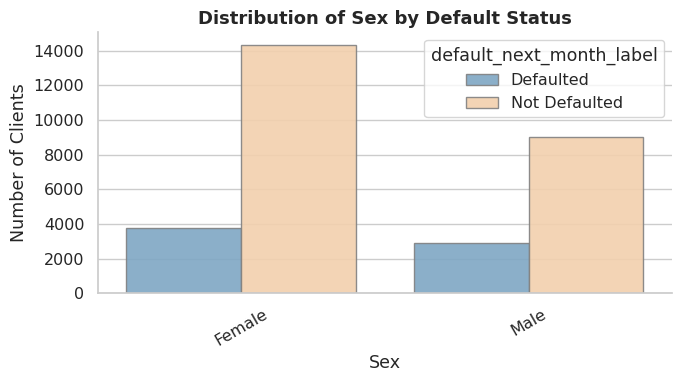

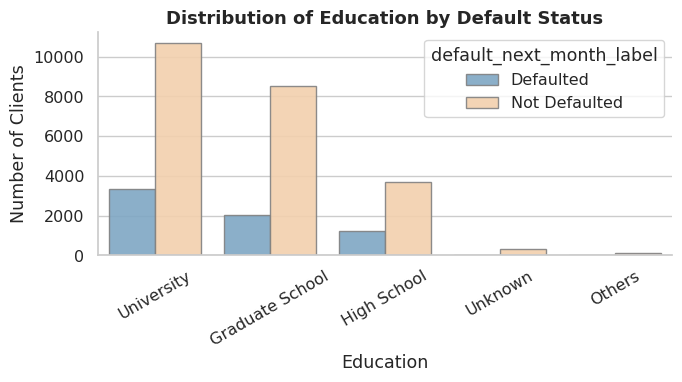

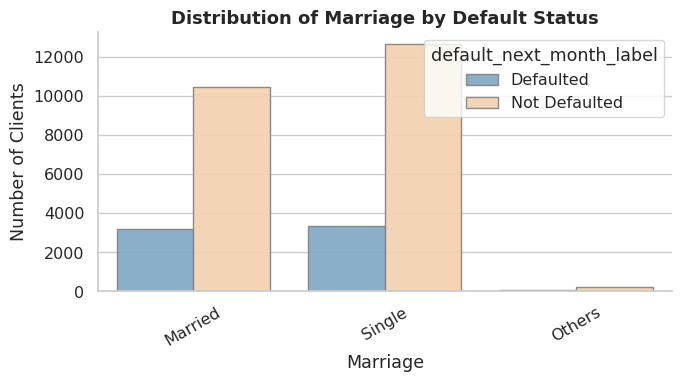

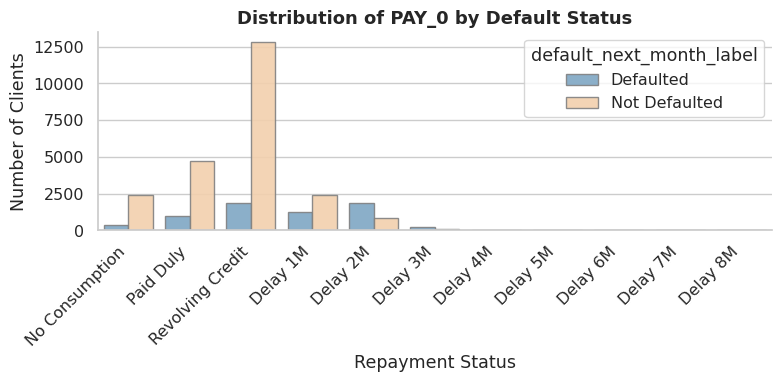

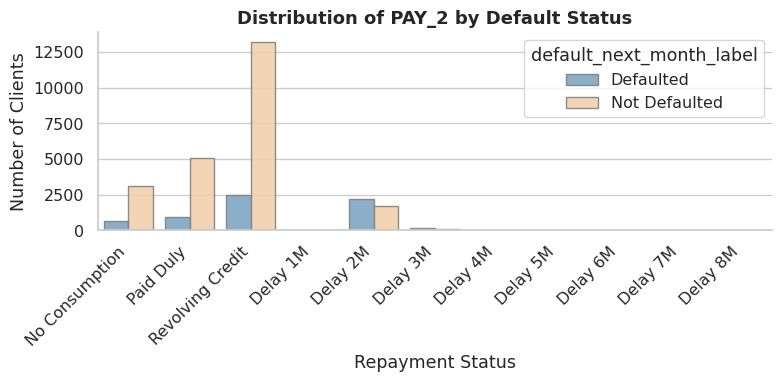

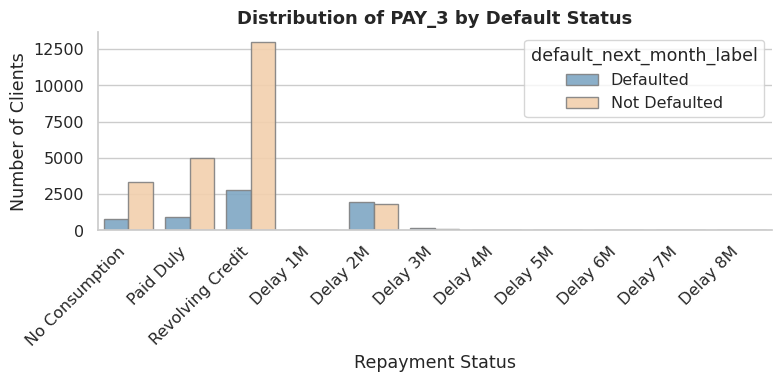

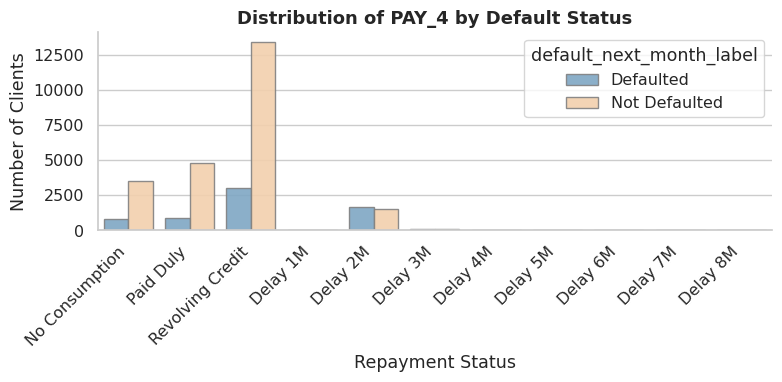

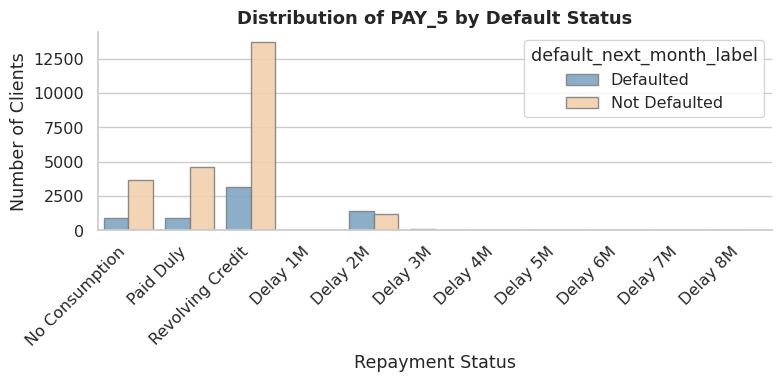

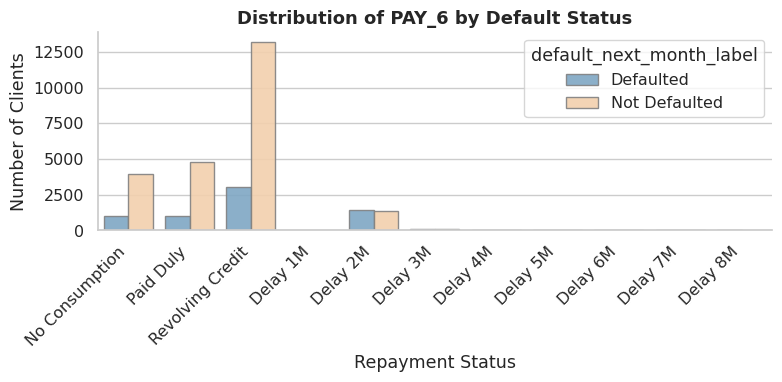

In [ ]:
# ===============================================================
# 📊 Step 2: Visualize each categorical variable vs Default Status
# ===============================================================

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", font_scale=1.05)
custom_palette = ["#74A9CF", "#FDD0A2"]

categorical_cols = ["SEX_label", "EDUCATION_label", "MARRIAGE_label"]

for col in categorical_cols:
    plt.figure(figsize=(7, 4))
    ax = sns.countplot(
        data=df, x=col, hue="default_next_month_label",
        palette=custom_palette, edgecolor="gray", alpha=0.9
    )
    plt.title(f"Distribution of {col.replace('_label','').title()} by Default Status", fontsize=13, weight="bold")
    plt.xlabel(col.replace('_label','').title())
    plt.ylabel("Number of Clients")
    plt.xticks(rotation=30)
    sns.despine()
    plt.tight_layout()
    plt.show()

# ===============================================================
# 📊 Step: Visualize Repayment Status (PAY_0–PAY_6) vs Default
# ===============================================================

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", font_scale=1.05)
custom_palette = ["#74A9CF", "#FDD0A2"]

# List of payment status columns to visualize
pay_label_cols = ["PAY_0_label", "PAY_2_label", "PAY_3_label", "PAY_4_label", "PAY_5_label", "PAY_6_label"]

for col in pay_label_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(
        data=df,
        x=col,
        hue="default_next_month_label",
        order=[
            "No Consumption", "Paid Duly", "Revolving Credit",
            "Delay 1M", "Delay 2M", "Delay 3M", "Delay 4M", "Delay 5M",
            "Delay 6M", "Delay 7M", "Delay 8M"
        ],
        palette=custom_palette,
        edgecolor="gray",
        alpha=0.9
    )

    plt.title(f"Distribution of {col.replace('_label', '').upper()} by Default Status", fontsize=13, weight="bold")
    plt.xlabel("Repayment Status")
    plt.ylabel("Number of Clients")
    plt.xticks(rotation=45, ha="right")
    sns.despine()
    plt.tight_layout()
    plt.show()


## Key findings:
### 1. default/not default distribution is quite different across different categorical variables
### 2. education variables categories should be aligned to 4 types, combine the unknown and other to others/unknown
### 3. For payments columns, not one-hot encoding, but keep orical format, sequence has a natural order: −2 < −1 < 0 < 1 < 2 < … < 9 → the higher the number, the longer the delay, the higher the risk.

In [ ]:
df["EDUCATION"] = df["EDUCATION"].replace({0: 4, 5: 4, 6: 4})
cat_cols = ["SEX", "EDUCATION", "MARRIAGE"]

for col in cat_cols:
    print(f"\n🧩 {col}: {sorted([int(x) for x in df[col].unique()])}")



🧩 SEX: [1, 2]

🧩 EDUCATION: [1, 2, 3, 4]

🧩 MARRIAGE: [0, 1, 2, 3]


## One-hot Encoding for categorical variables

In [ ]:
# ===============================================================
# 🧮 Step: One-Hot Encoding for Categorical Variables (Fixed for bools)
# ===============================================================

# Copy the dataframe (safe practice)
df_encoded = df.copy()

# Define categorical columns to encode
cat_features = ["SEX", "EDUCATION", "MARRIAGE"]

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=cat_features, drop_first=True)

# 🔧 Convert any boolean dummies (True/False) to numeric (0/1)
for col in df_encoded.select_dtypes(include='bool').columns:
    df_encoded[col] = df_encoded[col].astype(int)

# Check the result
print("✅ One-hot encoding completed and converted to numeric (0/1).")
print("Encoded dataframe shape:", df_encoded.shape)
print("\nEncoded columns preview:")
encoded_cols = [col for col in df_encoded.columns if any(c in col for c in cat_features)]
print(encoded_cols[:15])
print(df_encoded.head(5))

✅ One-hot encoding completed and converted to numeric (0/1).
Encoded dataframe shape: (30000, 39)

Encoded columns preview:
['SEX_label', 'EDUCATION_label', 'MARRIAGE_label', 'SEX_2', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3']
   ID  LIMIT_BAL  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
0   1      20000   24      2      2     -1     -1     -2     -2       3913   
1   2     120000   26     -1      2      0      0      0      2       2682   
2   3      90000   34      0      0      0      0      0      0      29239   
3   4      50000   37      0      0      0      0      0      0      46990   
4   5      50000   57     -1      0     -1      0      0      0       8617   

   ...       PAY_4_label       PAY_5_label       PAY_6_label  SEX_2  \
0  ...         Paid Duly    No Consumption    No Consumption      1   
1  ...  Revolving Credit  Revolving Credit          Delay 2M      1   
2  ...  Revolving Credit  Revolving Credit  Rev

## Explore numerical variables

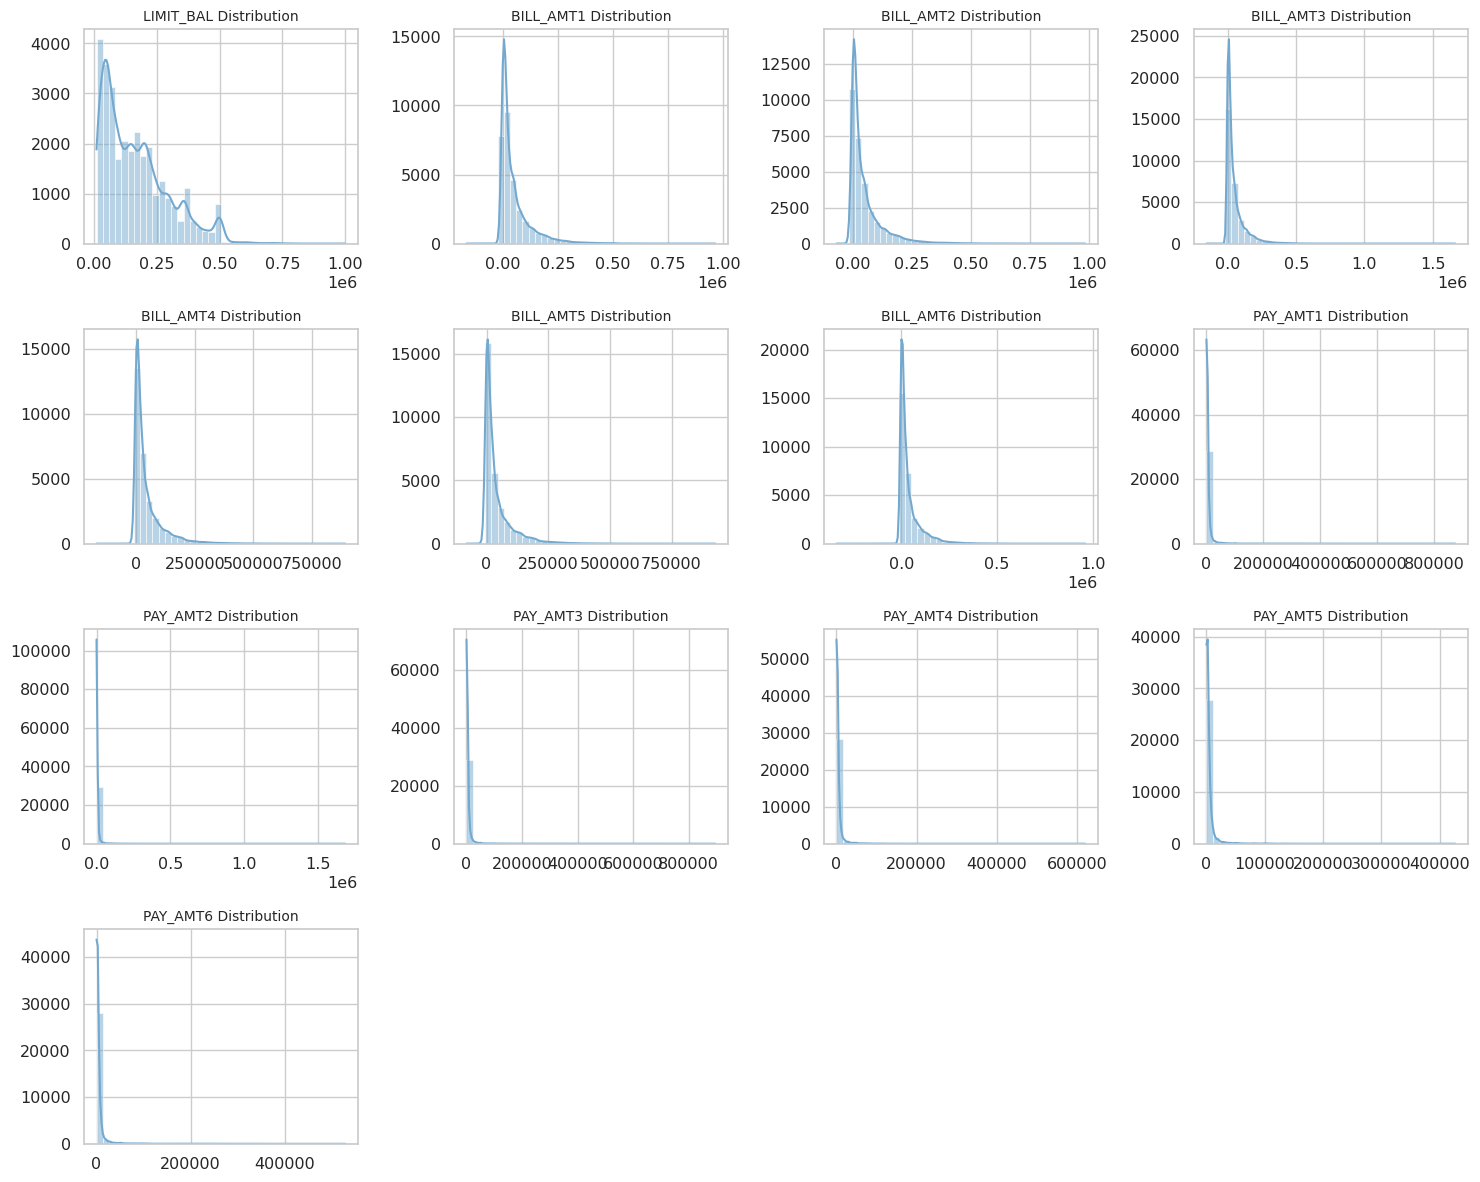

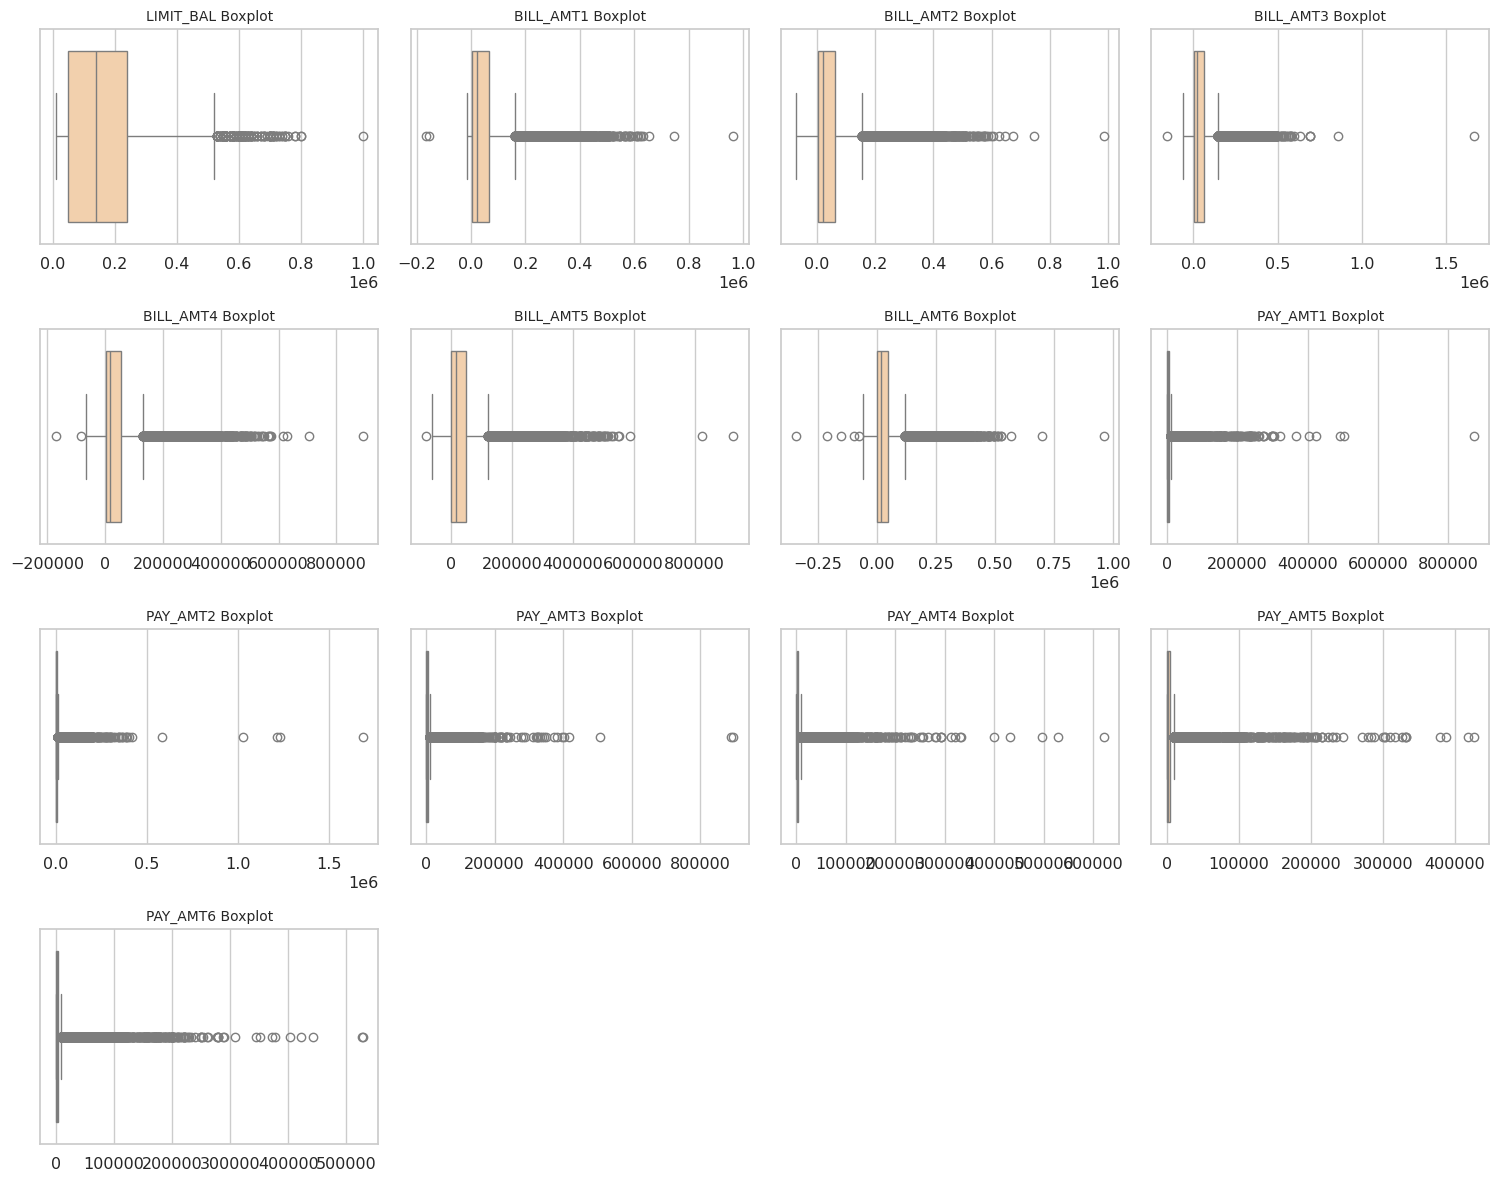

=== Skewness of Numerical Variables ===
PAY_AMT2   :   30.454 → Right-skewed
PAY_AMT3   :   17.217 → Right-skewed
PAY_AMT1   :   14.668 → Right-skewed
PAY_AMT4   :   12.905 → Right-skewed
PAY_AMT5   :   11.127 → Right-skewed
PAY_AMT6   :   10.641 → Right-skewed
BILL_AMT3  :    3.088 → Right-skewed
BILL_AMT5  :    2.876 → Right-skewed
BILL_AMT6  :    2.847 → Right-skewed
BILL_AMT4  :    2.822 → Right-skewed
BILL_AMT2  :    2.705 → Right-skewed
BILL_AMT1  :    2.664 → Right-skewed
LIMIT_BAL  :    0.993 → Right-skewed


In [ ]:
# ===============================================================
# 📊 Step: Distribution & Skewness Check for Numerical Variables
# ===============================================================

import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical variables to explore
num_cols = [
    "LIMIT_BAL",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"
]

# ---------------------------------------------------------------
# 1️⃣ Histograms for distribution check
# ---------------------------------------------------------------
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True, bins=40, color="#74A9CF")
    plt.title(f"{col} Distribution", fontsize=10)
    plt.xlabel("")
    plt.ylabel("")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# 2️⃣ Boxplots for outlier detection
# ---------------------------------------------------------------
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col], color="#FDD0A2", linewidth=1)
    plt.title(f"{col} Boxplot", fontsize=10)
    plt.xlabel("")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# 3️⃣ Skewness check
# ---------------------------------------------------------------
skew_vals = df[num_cols].skew().sort_values(ascending=False)

print("=== Skewness of Numerical Variables ===")
for col, val in skew_vals.items():
    direction = "Right-skewed" if val > 0.5 else ("Left-skewed" if val < -0.5 else "Approximately symmetric")
    print(f"{col:<10} : {val:>8.3f} → {direction}")


## Identify Outliers using 1.5×IQR Rule

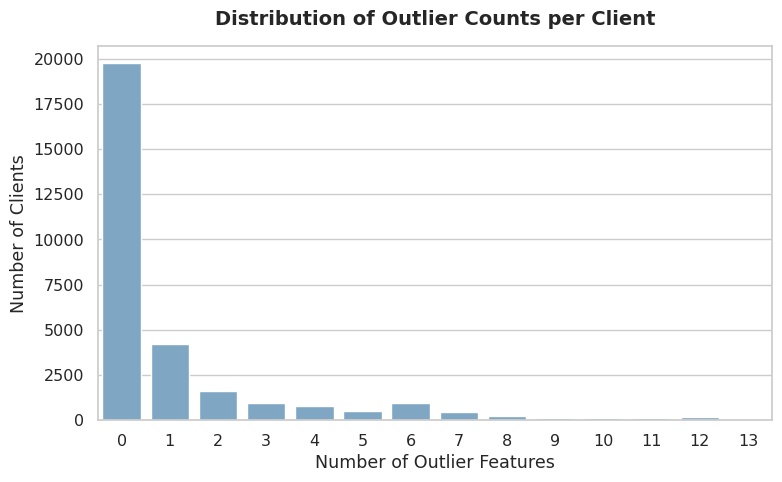

=== Outlier Summary ===
count    30000.000000
mean         1.080833
std          2.180747
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         13.000000
Name: outlier_count, dtype: float64

Rows with at least 1 outlier: 10269


In [ ]:
# ===============================================================
# 📉 Step: Identify Outliers using 1.5×IQR Rule
# ===============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns to check
num_cols = [
    "LIMIT_BAL",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"
]

# ---------------------------------------------------------------
# 1️⃣ Create the outlier flag DataFrame (same shape as numeric subset)
# ---------------------------------------------------------------
df_rating_outlier = pd.DataFrame(0, index=df.index, columns=num_cols)

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Mark 1 if the value is below lower bound or above upper bound
    df_rating_outlier[col] = ((df[col] < lower) | (df[col] > upper)).astype(int)

# ---------------------------------------------------------------
# 2️⃣ Count how many outliers each row has
# ---------------------------------------------------------------
df_rating_outlier["outlier_count"] = df_rating_outlier.sum(axis=1)

# ---------------------------------------------------------------
# 3️⃣ Plot distribution of outlier counts
# ---------------------------------------------------------------
plt.figure(figsize=(8,5))
sns.countplot(x="outlier_count", data=df_rating_outlier, color="#74A9CF")
plt.title("Distribution of Outlier Counts per Client", fontsize=14, weight="bold", pad=15)
plt.xlabel("Number of Outlier Features")
plt.ylabel("Number of Clients")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# 4️⃣ Optional: Quick summary
# ---------------------------------------------------------------
print("=== Outlier Summary ===")
print(df_rating_outlier["outlier_count"].describe())
print("\nRows with at least 1 outlier:", (df_rating_outlier["outlier_count"] > 0).sum())


## Reshape numerical variables

### 🔧 Yeo-Jognson + MinMax v.s. MinMax

| **Goal** | **Recommended Method** | **Works with Negatives?** |
|:----------|:------------------------|:---------------------------:|
| ✅ Just scale to same range | **Min–Max Scaling (0–1)** | ✅ Yes |
| ✅ Reduce skewness + scale | **Yeo–Johnson Power Transform → Min–Max Scaling** | ✅ Yes |


### Yeo-Jognson + MinMax

In [ ]:
# ===============================================================
# ⚙️ Step: Yeo–Johnson Transformation + Min–Max Normalization
# ===============================================================

from sklearn.preprocessing import PowerTransformer, MinMaxScaler
import numpy as np

# Make a working copy
df_scaled = df_encoded.copy()

# Target numerical columns
cols = [
    "LIMIT_BAL",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"
]

# ✅ Step 1: Apply Yeo–Johnson (reduces skewness, handles negatives/zeros)
pt = PowerTransformer(method="yeo-johnson", standardize=False)
df_scaled[cols] = pt.fit_transform(df_scaled[cols])

# ✅ Step 2: Normalize (Min–Max scaling between 0–1, multiplied by 1000)
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled[cols] = scaler.fit_transform(df_scaled[cols]) * 1000

print("✅ Transformation complete: Yeo–Johnson + Min–Max applied to all selected variables.")

# Optional: verify transformation results
print("\n=== Summary after Transformation ===")
print(df_scaled[cols].describe().T)


✅ Transformation complete: Yeo–Johnson + Min–Max applied to all selected variables.

=== Summary after Transformation ===
             count        mean         std  min         25%         50%  \
LIMIT_BAL  30000.0  406.392965  193.622640  0.0  221.695569  422.606762   
BILL_AMT1  30000.0  809.737931   19.516325  0.0  796.823777  803.031554   
BILL_AMT2  30000.0  781.145903   22.705238  0.0  765.940961  773.695650   
BILL_AMT3  30000.0  759.998897   14.501161  0.0  750.491617  755.158535   
BILL_AMT4  30000.0  829.026985   16.812042  0.0  818.169961  823.632869   
BILL_AMT5  30000.0  769.594358   21.576750  0.0  755.607198  763.184904   
BILL_AMT6  30000.0  796.354076   16.457007  0.0  786.084869  791.150168   
PAY_AMT1   30000.0  221.031721  128.175721  0.0  189.714622  232.184703   
PAY_AMT2   30000.0  199.823614  117.174236  0.0  167.562994  211.611414   
PAY_AMT3   30000.0  232.583538  142.692003  0.0  172.058674  256.483665   
PAY_AMT4   30000.0  254.240096  161.110933  0.0  186.

### Outlier Check After Transformation

=== Outlier Ratio by Column (Post-Transformation) ===
LIMIT_BAL     0.00
BILL_AMT1     6.40
BILL_AMT2     6.04
BILL_AMT3     6.62
BILL_AMT4     6.96
BILL_AMT5     7.05
BILL_AMT6     7.71
PAY_AMT1     21.00
PAY_AMT2     20.77
PAY_AMT3      1.63
PAY_AMT4      1.48
PAY_AMT5      1.21
PAY_AMT6      0.87
dtype: float64


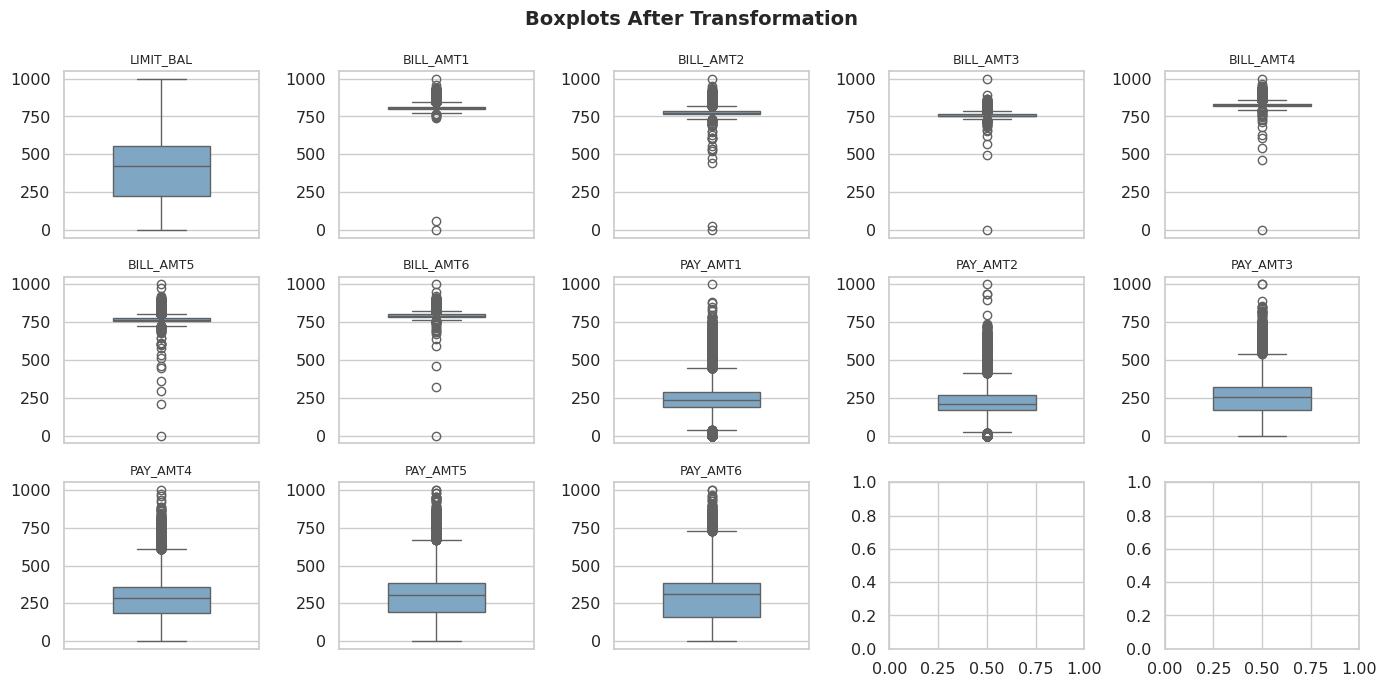

In [ ]:
# ===============================================================
# 📦 Outlier Check After Transformation (Numeric Columns Only)
# ===============================================================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Focus only on numeric columns that were scaled
num_cols = [
    "LIMIT_BAL",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"
]

# --- 1️⃣ Calculate IQR and outlier ratios ---
Q1 = df_scaled[num_cols].quantile(0.25)
Q3 = df_scaled[num_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (df_scaled[num_cols] < (Q1 - 1.5 * IQR)) | (df_scaled[num_cols] > (Q3 + 1.5 * IQR))
outlier_ratio = (outlier_mask.sum() / len(df_scaled)) * 100

print("=== Outlier Ratio by Column (Post-Transformation) ===")
print(outlier_ratio.round(2))

# --- 2️⃣ Visualize a few examples (boxplots) ---
fig, axes = plt.subplots(3, 5, figsize=(14, 7))
axes = axes.flatten()

for i, col in enumerate(num_cols[:15]):  # first 15 cols if needed
    sns.boxplot(y=df_scaled[col], ax=axes[i], color="#74A9CF", width=0.5)
    axes[i].set_title(col, fontsize=9)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.suptitle("Boxplots After Transformation", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()


### PAY_AMT1 & PAY_AMT2 vs Default Status & Outlier

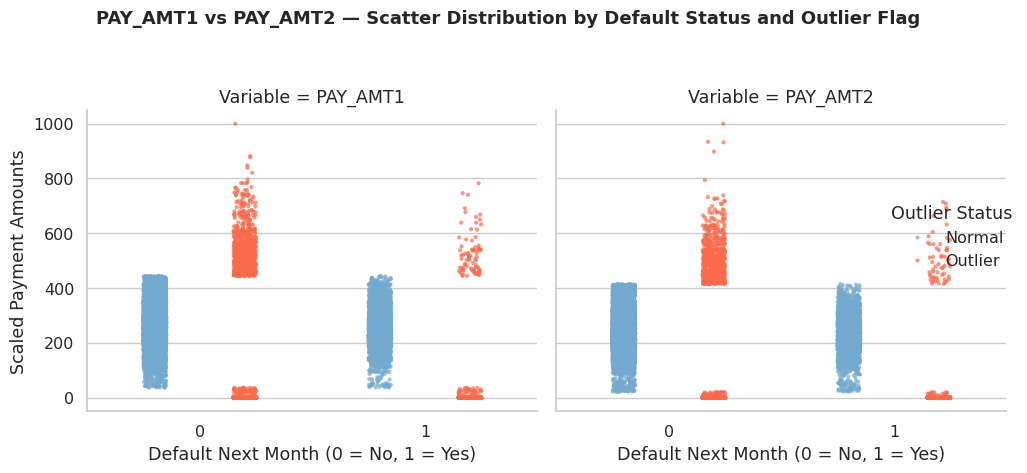


=== 📊 Default Rate Comparison: Normal vs Outlier Clients ===


,Variable,Outlier %,DefaultRate_Normal,DefaultRate_Outlier
0,PAY_AMT1,21.000,0.196,0.317
1,PAY_AMT2,20.767,0.200,0.300


In [ ]:
# ===============================================================
# 🎯 Scatter Plot: PAY_AMT1 & PAY_AMT2 vs Default Status & Outlier
# ===============================================================
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

target_col = "default_next_month_label"
selected_cols = ["PAY_AMT1", "PAY_AMT2"]

df_plot = df_scaled[selected_cols + [target_col]].copy()

# Convert target to numeric if it's text
if df_plot[target_col].dtype == "object":
    df_plot[target_col] = df_plot[target_col].map({
        "Defaulted": 1,
        "Not Defaulted": 0
    })

# --- Detect outliers (IQR rule)
Q1 = df_plot[selected_cols].quantile(0.25)
Q3 = df_plot[selected_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = (df_plot[selected_cols] < (Q1 - 1.5 * IQR)) | (df_plot[selected_cols] > (Q3 + 1.5 * IQR))
outlier_flags = outlier_mask.astype(int).add_suffix("_outlier")
df_plot = pd.concat([df_plot, outlier_flags], axis=1)

# --- Melt for plotting
df_melt = df_plot.melt(
    id_vars=[target_col, "PAY_AMT1_outlier", "PAY_AMT2_outlier"],
    value_vars=selected_cols,
    var_name="Variable",
    value_name="Value"
)
df_melt["OutlierFlag"] = np.where(
    (df_melt["Variable"] == "PAY_AMT1") & (df_melt["PAY_AMT1_outlier"] == 1), "Outlier",
    np.where((df_melt["Variable"] == "PAY_AMT2") & (df_melt["PAY_AMT2_outlier"] == 1), "Outlier", "Normal")
)

# ===============================================================
# 📈 Scatterplot version
# ===============================================================
g = sns.FacetGrid(df_melt, col="Variable", height=4.5, aspect=1.0, sharey=True)
g.map_dataframe(
    sns.stripplot,
    x=target_col, y="Value",
    hue="OutlierFlag",
    palette={"Normal": "#74A9CF", "Outlier": "#FB6A4A"},
    dodge=True, jitter=True, alpha=0.7, size=3
)

for ax in g.axes.flat:
    ax.set_xlabel("Default Next Month (0 = No, 1 = Yes)")
    ax.set_ylabel("Scaled Payment Amounts")
g.add_legend(title="Outlier Status")
g.fig.suptitle("PAY_AMT1 vs PAY_AMT2 — Scatter Distribution by Default Status and Outlier Flag",
               fontsize=13, weight="bold", y=1.05)
plt.tight_layout()
plt.show()

# ===============================================================
# 📋 Keep your summary table unchanged
# ===============================================================
summary = []
for col in selected_cols:
    normal_rate = df_plot.loc[df_plot[f"{col}_outlier"] == 0, target_col].mean()
    outlier_rate = df_plot.loc[df_plot[f"{col}_outlier"] == 1, target_col].mean()
    summary.append({
        "Variable": col,
        "Outlier %": outlier_mask[col].mean() * 100,
        "DefaultRate_Normal": normal_rate,
        "DefaultRate_Outlier": outlier_rate
    })
summary_df = pd.DataFrame(summary)
print("\n=== 📊 Default Rate Comparison: Normal vs Outlier Clients ===")
display(summary_df.round(3))


## Outliers:
### The outliers do have higher default rates (~30–31% vs ~20%).

### That means these are not random data errors — they carry real behavioral meaning (for instance, very small or very large payments correlate with default risk).

### Therefore, not remove or winsorize these outliers, because:

### They are informative for the logistic regression.

### Winsorizing would distort real payment patterns related to risk.

## MinMax only

In [ ]:
# ===============================================================
# ⚙️ Step: Min–Max Normalization Only (No Yeo–Johnson)
# ===============================================================

from sklearn.preprocessing import MinMaxScaler

# Make a new copy for comparison
df_minmax = df_encoded.copy()

# Target numerical columns
cols = [
    "LIMIT_BAL",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"
]

# Step: Apply Min–Max scaling (0–1), multiplied by 1000
scaler = MinMaxScaler(feature_range=(0, 1))
df_minmax[cols] = scaler.fit_transform(df_minmax[cols]) * 1000

print("✅ Transformation complete: Min–Max scaling (0–1×1000) applied to all selected variables.")

# Optional: verify results
print("\n=== Summary after Min–Max Only ===")
print(df_minmax[cols].describe().T)


✅ Transformation complete: Min–Max scaling (0–1×1000) applied to all selected variables.

=== Summary after Min–Max Only ===
             count        mean         std  min         25%         50%  \
LIMIT_BAL  30000.0  159.075073  131.058244  0.0   40.404040  131.313131   
BILL_AMT1  30000.0  191.845905   65.159231  0.0  149.668257  166.324216   
BILL_AMT2  30000.0  112.892827   67.546008  0.0   69.053049   86.339859   
BILL_AMT3  30000.0  112.156817   38.075753  0.0   87.808486   97.374040   
BILL_AMT4  30000.0  200.890883   60.600701  0.0  162.329524  178.084489   
BILL_AMT5  30000.0  120.619532   60.284437  0.0   82.396220   98.599908   
BILL_AMT6  30000.0  290.850963   45.766247  0.0  261.943936  274.097476   
PAY_AMT1   30000.0    6.483393   18.960841  0.0    1.144752    2.403978   
PAY_AMT2   30000.0    3.515590   13.680123  0.0    0.494580    1.192809   
PAY_AMT3   30000.0    5.831973   19.649749  0.0    0.435248    2.008839   
PAY_AMT4   30000.0    7.771460   25.227310  0.0   

=== Outlier Ratio by Column (After Min–Max Normalization) ===
LIMIT_BAL    0.56
BILL_AMT1    8.00
BILL_AMT2    7.98
BILL_AMT3    8.23
BILL_AMT4    8.74
BILL_AMT5    9.08
BILL_AMT6    8.98
PAY_AMT1     9.15
PAY_AMT2     9.05
PAY_AMT3     8.66
PAY_AMT4     9.98
PAY_AMT5     9.82
PAY_AMT6     9.86
dtype: float64


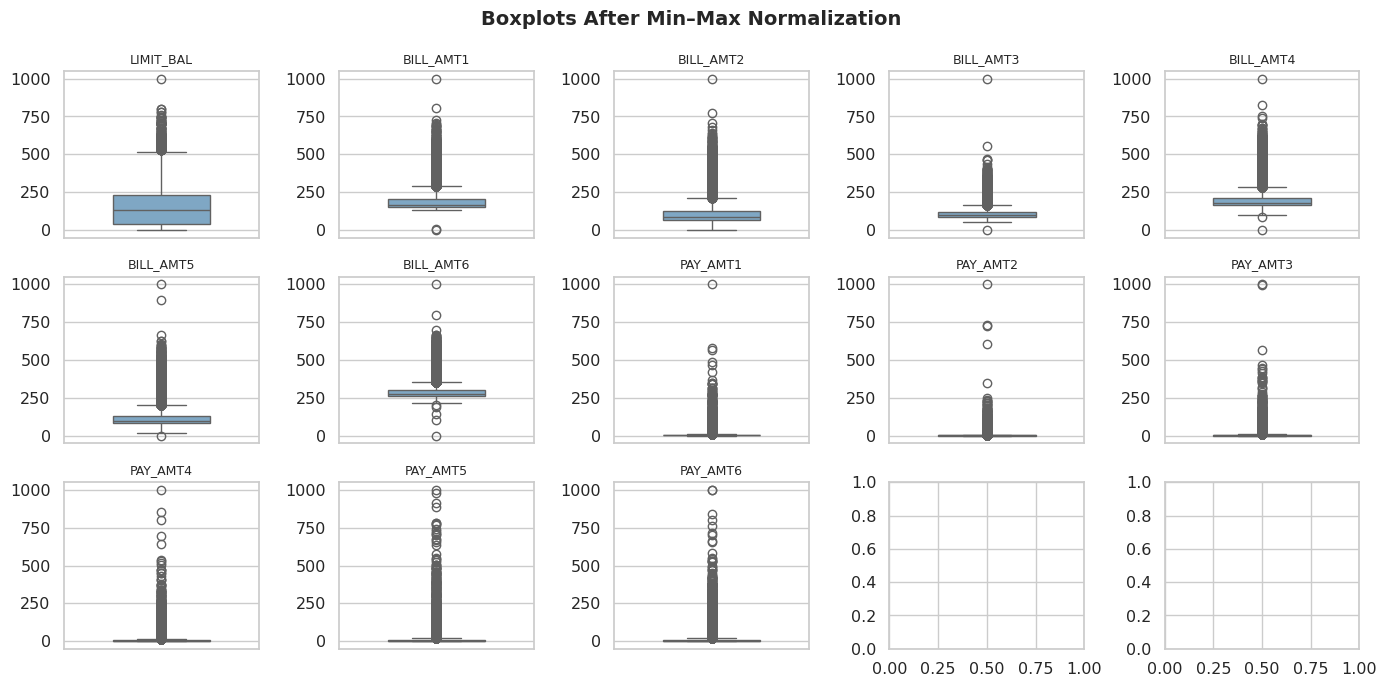

In [ ]:
# ===============================================================
# 📦 Outlier Check After Min–Max Normalization (Numeric Columns Only)
# ===============================================================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Focus only on numeric columns that were scaled
num_cols = [
    "LIMIT_BAL",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"
]

# --- 1️⃣ Calculate IQR and Outlier Ratios (Min–Max Only) ---
Q1 = df_minmax[num_cols].quantile(0.25)
Q3 = df_minmax[num_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (df_minmax[num_cols] < (Q1 - 1.5 * IQR)) | (df_minmax[num_cols] > (Q3 + 1.5 * IQR))
outlier_ratio = (outlier_mask.sum() / len(df_minmax)) * 100

print("=== Outlier Ratio by Column (After Min–Max Normalization) ===")
print(outlier_ratio.round(2))

# --- 2️⃣ Visualize Boxplots for Scaled Variables ---
fig, axes = plt.subplots(3, 5, figsize=(14, 7))
axes = axes.flatten()

for i, col in enumerate(num_cols[:15]):  # display up to 15 columns if available
    sns.boxplot(y=df_minmax[col], ax=axes[i], color="#74A9CF", width=0.5)
    axes[i].set_title(col, fontsize=9)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.suptitle("Boxplots After Min–Max Normalization", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()


### The only minmax reshapre cannot perform as well as Yeo & minmax

## Correlation analysis

=== 📊 Correlation Heatmap — BEFORE Transformation ===


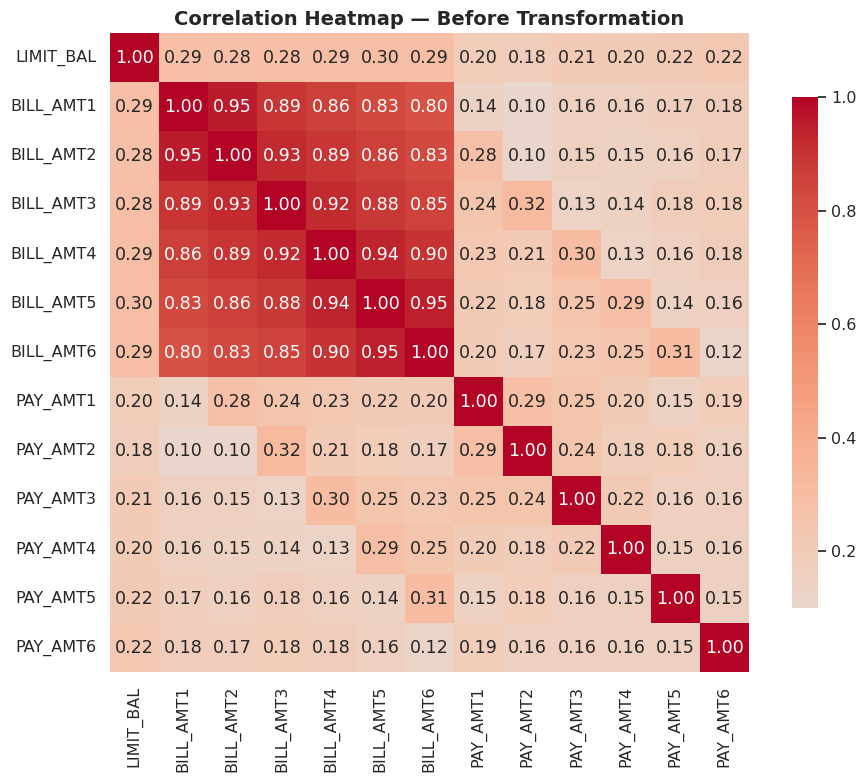


=== Highly Correlated Variable Pairs (Before, |r| > 0.8) ===
BILL_AMT1  BILL_AMT2    0.951
BILL_AMT5  BILL_AMT6    0.946
BILL_AMT4  BILL_AMT5    0.940
BILL_AMT2  BILL_AMT3    0.928
BILL_AMT3  BILL_AMT4    0.924
BILL_AMT4  BILL_AMT6    0.901
BILL_AMT2  BILL_AMT4    0.892
BILL_AMT1  BILL_AMT3    0.892
BILL_AMT3  BILL_AMT5    0.884
BILL_AMT1  BILL_AMT4    0.860
BILL_AMT2  BILL_AMT5    0.860
BILL_AMT3  BILL_AMT6    0.853
BILL_AMT2  BILL_AMT6    0.832
BILL_AMT1  BILL_AMT5    0.830
           BILL_AMT6    0.803
dtype: float64


=== 📊 Correlation Heatmap — AFTER Transformation ===


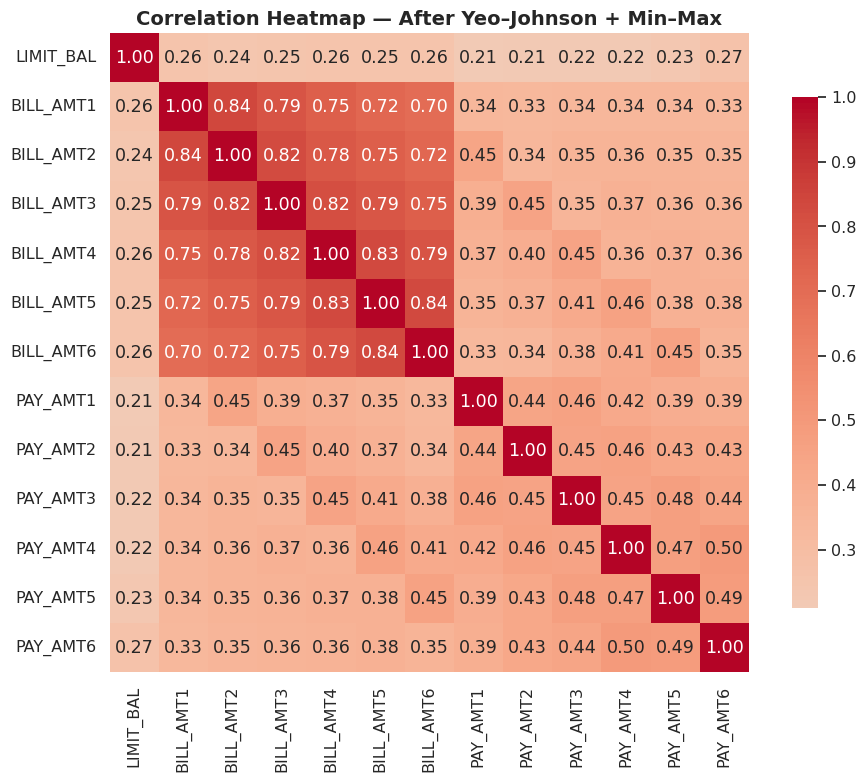


=== Highly Correlated Variable Pairs (After, |r| > 0.8) ===
BILL_AMT1  BILL_AMT2    0.839
BILL_AMT5  BILL_AMT6    0.836
BILL_AMT4  BILL_AMT5    0.834
BILL_AMT2  BILL_AMT3    0.822
BILL_AMT3  BILL_AMT4    0.819
dtype: float64


=== 🔍 Correlation Change Summary (Top 10 largest Δr) ===
PAY_AMT6  PAY_AMT5    0.338
PAY_AMT5  PAY_AMT6    0.338
PAY_AMT4  PAY_AMT6    0.338
PAY_AMT6  PAY_AMT4    0.338
PAY_AMT5  PAY_AMT4    0.320
PAY_AMT4  PAY_AMT5    0.320
PAY_AMT5  PAY_AMT3    0.316
PAY_AMT3  PAY_AMT5    0.316
          PAY_AMT6    0.282
PAY_AMT6  PAY_AMT3    0.282
dtype: float64


In [ ]:
# ===============================================================
# 📊 Correlation Analysis — Before & After Transformation
# ===============================================================

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Target numeric columns
cols = [
    "LIMIT_BAL",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"
]

# ===============================================================
# 1️⃣ Correlation BEFORE Transformation
# ===============================================================

print("=== 📊 Correlation Heatmap — BEFORE Transformation ===")
corr_before = df_encoded[cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_before, cmap="coolwarm", center=0, annot=True, fmt=".2f", square=True,
            cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap — Before Transformation", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

# --- Identify highly correlated pairs before reshape ---
high_corr_before = corr_before.where(np.triu(np.ones(corr_before.shape), k=1).astype(bool))
high_corr_pairs_before = high_corr_before.stack().sort_values(ascending=False)
print("\n=== Highly Correlated Variable Pairs (Before, |r| > 0.8) ===")
print(high_corr_pairs_before[high_corr_pairs_before.abs() > 0.8].round(3))


# ===============================================================
# 2️⃣ Correlation AFTER Transformation (Yeo–Johnson + Min–Max)
# ===============================================================

print("\n\n=== 📊 Correlation Heatmap — AFTER Transformation ===")
corr_after = df_scaled[cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_after, cmap="coolwarm", center=0, annot=True, fmt=".2f", square=True,
            cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap — After Yeo–Johnson + Min–Max", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

# --- Identify highly correlated pairs after reshape ---
high_corr_after = corr_after.where(np.triu(np.ones(corr_after.shape), k=1).astype(bool))
high_corr_pairs_after = high_corr_after.stack().sort_values(ascending=False)
print("\n=== Highly Correlated Variable Pairs (After, |r| > 0.8) ===")
print(high_corr_pairs_after[high_corr_pairs_after.abs() > 0.8].round(3))


# ===============================================================
# 3️⃣ Optional Comparison Summary
# ===============================================================
print("\n\n=== 🔍 Correlation Change Summary (Top 10 largest Δr) ===")
delta_corr = (corr_after - corr_before).abs().stack().sort_values(ascending=False)
print(delta_corr.head(10).round(3))


### VIF

In [ ]:
# ===============================================================
# 📈 Variance Inflation Factor (VIF) Analysis — After Transformation
# ===============================================================
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Target columns (same as correlation analysis)
cols = [
    "LIMIT_BAL",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"
]

# Ensure numeric and no NaNs
df_vif = df_scaled[cols].dropna().copy()

# --- Compute VIF for each variable ---
vif_data = pd.DataFrame()
vif_data["Variable"] = df_vif.columns
vif_data["VIF"] = [
    variance_inflation_factor(df_vif.values, i)
    for i in range(df_vif.shape[1])
]

# Sort by severity
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print("\n=== 📈 Variance Inflation Factor (VIF) Results — After Transformation ===")
display(vif_data.round(3))

# ===============================================================
# 🔍 Interpretation Guidelines
# ===============================================================
print("""
VIF Interpretation:
• VIF ≈ 1–5 → Low to moderate multicollinearity (acceptable)
• VIF > 5   → Noticeable multicollinearity; consider reducing correlated predictors
• VIF > 10  → Serious multicollinearity; remove or combine variables (e.g., drop some BILL_AMT variables)
""")



=== 📈 Variance Inflation Factor (VIF) Results — After Transformation ===


,Variable,VIF
0,BILL_AMT4,11165.753
1,BILL_AMT3,11157.026
2,BILL_AMT6,8437.809
3,BILL_AMT1,6718.486
4,BILL_AMT5,5883.347
5,BILL_AMT2,5501.241
6,PAY_AMT1,6.481
7,PAY_AMT2,6.395
8,PAY_AMT3,6.311
9,PAY_AMT4,6.157



VIF Interpretation:
• VIF ≈ 1–5 → Low to moderate multicollinearity (acceptable)
• VIF > 5   → Noticeable multicollinearity; consider reducing correlated predictors
• VIF > 10  → Serious multicollinearity; remove or combine variables (e.g., drop some BILL_AMT variables)



### Average/PCA the bill columns to reduce VIF

In [ ]:
print(df_scaled.columns)
print(df_scaled.head())

Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_next_month',
       'default_next_month_label', 'SEX_label', 'EDUCATION_label',
       'MARRIAGE_label', 'PAY_0_label', 'PAY_2_label', 'PAY_3_label',
       'PAY_4_label', 'PAY_5_label', 'PAY_6_label', 'SEX_2', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')
   ID   LIMIT_BAL  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6   BILL_AMT1  \
0   1   83.942534   24      2      2     -1     -1     -2     -2  796.959133   
1   2  388.896714   26     -1      2      0      0      0      2  796.480631   
2   3  329.583403   34      0      0      0      0      0      0  805.065956   
3   4  221.695569   37      0      0      0      0      0      0  810.074319   
4   5

In [ ]:
# ===============================================================
# 📂 Extended Feature Comparison: BILL_AMT Averaging vs PCA (Fixed column names)
# ===============================================================

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# ===============================================================
# 1️⃣ Full Scaled Dataset
# ===============================================================
df_scaled_full = df_scaled.copy()

# ===============================================================
# 2️⃣ Averaged BILL_AMT Version
# ===============================================================
df_scaled_avg = df_scaled.copy()
df_scaled_avg["BILL_AMT_MEAN"] = df_scaled_avg[
    ["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]
].mean(axis=1)
df_scaled_avg.drop(
    columns=["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"],
    inplace=True
)

# ===============================================================
# 3️⃣ PCA-Based BILL_AMT Version (2 components)
# ===============================================================
df_scaled_pca = df_scaled.copy()
pca = PCA(n_components=2, random_state=42)
bill_amt_pca = pca.fit_transform(df_scaled_pca[
    ["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]
])
df_scaled_pca["BILL_PC1"], df_scaled_pca["BILL_PC2"] = bill_amt_pca[:,0], bill_amt_pca[:,1]
df_scaled_pca.drop(
    columns=["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"],
    inplace=True
)

# ===============================================================
# 4️⃣ Select Full Feature Set (using your actual column names)
# ===============================================================

target_col = "default_next_month_label"
y = df_scaled[target_col].map({"Not Defaulted": 0, "Defaulted": 1})

# Drop string-type label columns (like 'SEX_label', 'EDUCATION_label', etc.)
exclude_cols = [c for c in df_scaled.columns if c.endswith("_label")]
df_scaled = df_scaled.drop(columns=exclude_cols, errors="ignore")
df_scaled_avg = df_scaled_avg.drop(columns=exclude_cols, errors="ignore")
df_scaled_pca = df_scaled_pca.drop(columns=exclude_cols, errors="ignore")

# Convert any boolean to integer (ensure numeric)
for df_temp in [df_scaled, df_scaled_avg, df_scaled_pca]:
    for col in df_temp.select_dtypes(include="bool").columns:
        df_temp[col] = df_temp[col].astype(int)

# Base numeric predictors
base_cols = [
    "LIMIT_BAL", "AGE",
    "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"
]

# Add dummy variables automatically (SEX_, EDUCATION_, MARRIAGE_)
dummy_cols = [c for c in df_scaled.columns if any(x in c for x in ["SEX_", "EDUCATION_", "MARRIAGE_"])]
base_cols = base_cols + dummy_cols
base_cols = list(dict.fromkeys(base_cols))  # remove duplicates

# ✅ Confirm numeric only
non_numeric = df_scaled[base_cols].select_dtypes(exclude=[np.number]).columns
if len(non_numeric) > 0:
    print("⚠️ Non-numeric columns found:", list(non_numeric))
else:
    print("✅ All selected columns are numeric.")

# Build design matrices
X_avg = df_scaled_avg[base_cols + ["BILL_AMT_MEAN"]]
X_pca = df_scaled_pca[base_cols + ["BILL_PC1", "BILL_PC2"]]

print(f"✅ Final feature count:\nAveraging: {X_avg.shape[1]} columns\nPCA: {X_pca.shape[1]} columns\n")


# ===============================================================
# 5️⃣ Function to compute VIF
# ===============================================================
def compute_vif(df, cols):
    df_vif = df[cols].dropna().copy()
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df_vif.columns
    vif_data["VIF"] = [
        variance_inflation_factor(df_vif.values, i)
        for i in range(df_vif.shape[1])
    ]
    return vif_data.round(3).sort_values(by="VIF", ascending=False)

# ===============================================================
# 6️⃣ Train Logistic Regression & Evaluate
# ===============================================================
def evaluate_model(X, y, label):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    print(f"=== {label} ===")
    print(f"Accuracy: {acc:.3f}")
    print(f"AUC: {auc:.3f}")
    print(classification_report(y_test, y_pred, digits=3))
    return acc, auc

print("📈 Logistic Regression Comparison (Fixed Column Names):\n")
acc_avg, auc_avg = evaluate_model(X_avg, y, "Average BILL_AMT Model")
acc_pca, auc_pca = evaluate_model(X_pca, y, "PCA BILL_AMT Model")

# ===============================================================
# 7️⃣ Compare VIFs
# ===============================================================
print("\n=== VIF (After Averaging) ===")
display(compute_vif(df_scaled_avg, X_avg.columns))

print("\n=== VIF (After PCA) ===")
display(compute_vif(df_scaled_pca, X_pca.columns))

# ===============================================================
# 8️⃣ Summary Comparison
# ===============================================================
summary = pd.DataFrame({
    "Method": ["Averaging", "PCA (2 components)"],
    "Accuracy": [acc_avg, acc_pca],
    "AUC": [auc_avg, auc_pca]
})
print("\n=== 🧠 Model Performance Comparison ===")
display(summary)


✅ All selected columns are numeric.
✅ Final feature count:
Averaging: 22 columns
PCA: 23 columns

📈 Logistic Regression Comparison (Fixed Column Names):



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=== Average BILL_AMT Model ===
Accuracy: 0.804
AUC: 0.739
              precision    recall  f1-score   support

           0      0.817     0.964     0.885      7009
           1      0.658     0.242     0.354      1991

    accuracy                          0.804      9000
   macro avg      0.738     0.603     0.619      9000
weighted avg      0.782     0.804     0.767      9000



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=== PCA BILL_AMT Model ===
Accuracy: 0.806
AUC: 0.741
              precision    recall  f1-score   support

           0      0.819     0.964     0.885      7009
           1      0.663     0.249     0.362      1991

    accuracy                          0.806      9000
   macro avg      0.741     0.606     0.624      9000
weighted avg      0.784     0.806     0.770      9000


=== VIF (After Averaging) ===


,Variable,VIF
21,BILL_AMT_MEAN,556.644
19,MARRIAGE_2,262.716
18,MARRIAGE_1,224.800
1,AGE,21.905
0,LIMIT_BAL,8.139
9,PAY_AMT2,8.044
10,PAY_AMT3,7.694
8,PAY_AMT1,7.544
11,PAY_AMT4,7.259
6,PAY_5,6.446



=== VIF (After PCA) ===


,Variable,VIF
1,AGE,21.263
18,MARRIAGE_1,19.473
19,MARRIAGE_2,16.905
0,LIMIT_BAL,8.662
9,PAY_AMT2,8.102
8,PAY_AMT1,8.036
10,PAY_AMT3,7.785
11,PAY_AMT4,7.427
6,PAY_5,6.459
12,PAY_AMT5,5.911



=== 🧠 Model Performance Comparison ===


,Method,Accuracy,AUC
0,Averaging,0.804444,0.739251
1,PCA (2 components),0.805778,0.741454


### Use PCA for dimension reduction in bill columns is better for both accuracy and vif

## Train logistic model using PCA & class_weight='balanced' & penalties

## Here goes into logit modeling and tuning

✅ Train shape: (20000, 23), Test shape: (10000, 23)
Fitting 5 folds for each of 12 candidates, totalling 60 fits
✅ Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'l1_ratio': 0.3, 'max_iter': 2000, 'penalty': 'elasticnet', 'solver': 'saga'}

=== 🧠 Model Evaluation Metrics ===
Accuracy: 0.762
AUC: 0.750
F1 Score: 0.509
MSE: 0.185 | RMSE: 0.430
Log Loss: 0.555

Classification Report:
               precision    recall  f1-score   support

           0      0.883     0.807     0.843      7922
           1      0.446     0.592     0.509      2078

    accuracy                          0.762     10000
   macro avg      0.665     0.700     0.676     10000
weighted avg      0.792     0.762     0.774     10000



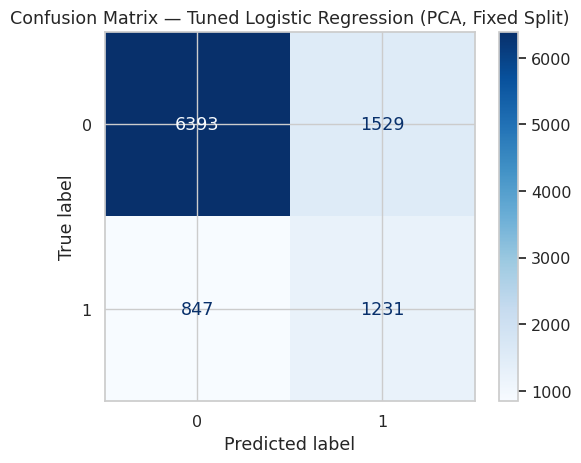

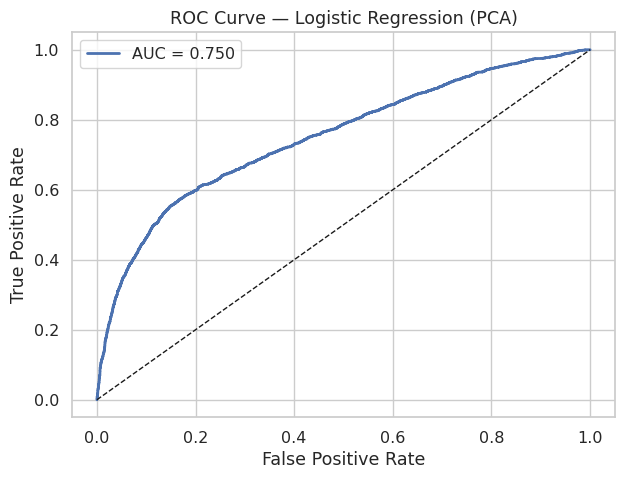

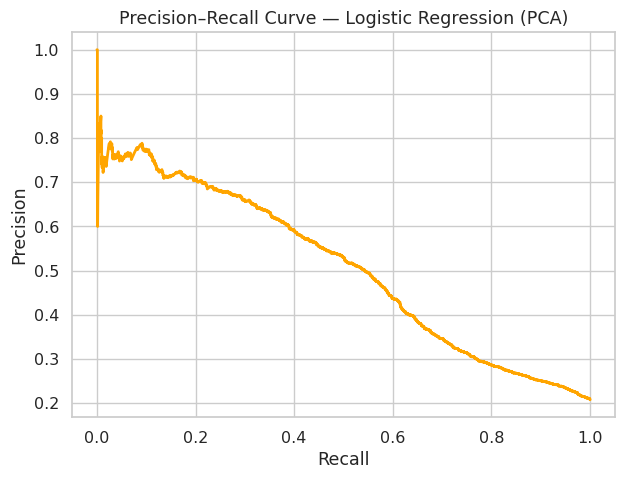

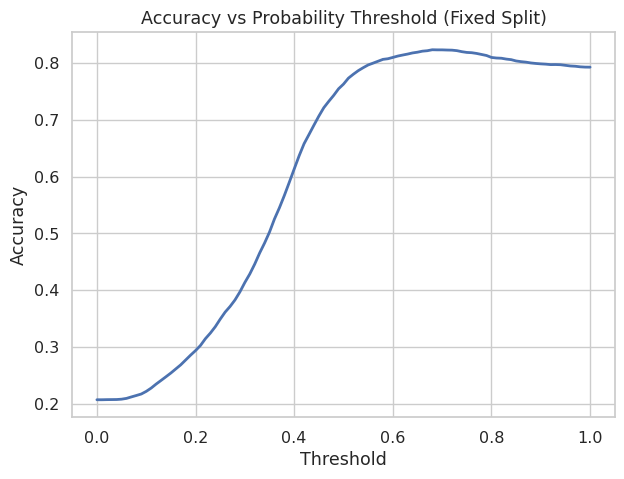

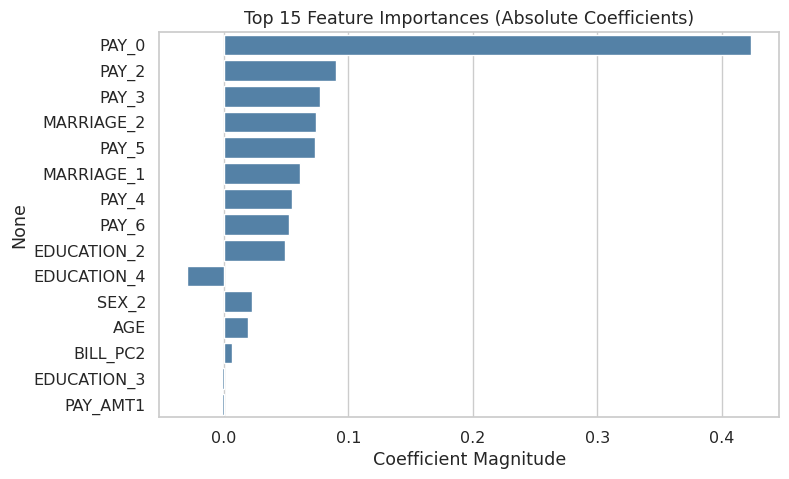

In [ ]:
# ===============================================================
# ⚙️ Optimized Logistic Regression with PCA features (Fixed Split)
# ===============================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, precision_recall_curve,
    accuracy_score, f1_score, mean_squared_error, log_loss,
    roc_auc_score, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# ---------------------------------------------------------------
# 1️⃣ Prepare Data — Fixed Split
# ---------------------------------------------------------------
X = X_pca.copy().reset_index(drop=True)
y = y.reset_index(drop=True)

X_train, X_test = X.iloc[:20000, :], X.iloc[20000:, :]
y_train, y_test = y.iloc[:20000], y.iloc[20000:]

print(f"✅ Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# ---------------------------------------------------------------
# 2️⃣ Hyperparameter Grid
# ---------------------------------------------------------------
param_grid = {
    "penalty": ["l1", "elasticnet"],   # skip pure L2 — too similar
    "C": [0.1, 1, 10],                 # smaller grid
    "l1_ratio": [0.3, 0.7],            # only if elasticnet
    "solver": ["saga"],
    "max_iter": [2000],
    "class_weight": ["balanced"]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ---------------------------------------------------------------
# 3️⃣ Grid Search CV
# ---------------------------------------------------------------
grid = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

print("✅ Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_

# ---------------------------------------------------------------
# 4️⃣ Evaluation
# ---------------------------------------------------------------
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)
f1 = f1_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_prob)
rmse = np.sqrt(mse)
ll = log_loss(y_test, y_prob)

print("\n=== 🧠 Model Evaluation Metrics ===")
print(f"Accuracy: {acc:.3f}")
print(f"AUC: {auc_score:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"MSE: {mse:.3f} | RMSE: {rmse:.3f}")
print(f"Log Loss: {ll:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

# ---------------------------------------------------------------
# 5️⃣ Confusion Matrix
# ---------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Confusion Matrix — Tuned Logistic Regression (PCA, Fixed Split)")
plt.show()

# ---------------------------------------------------------------
# 6️⃣ ROC Curve
# ---------------------------------------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], "k--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression (PCA)")
plt.legend()
plt.show()

# ---------------------------------------------------------------
# 7️⃣ Precision–Recall Curve
# ---------------------------------------------------------------
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(7,5))
plt.plot(recall, precision, color='orange', lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve — Logistic Regression (PCA)")
plt.show()

# ---------------------------------------------------------------
# 8️⃣ Threshold Tuning
# ---------------------------------------------------------------
thresholds = np.linspace(0, 1, 101)
accuracies = [(y_test == (y_prob >= t).astype(int)).mean() for t in thresholds]

plt.figure(figsize=(7,5))
plt.plot(thresholds, accuracies, lw=2)
plt.title("Accuracy vs Probability Threshold (Fixed Split)")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.show()

# ---------------------------------------------------------------
# 9️⃣ Feature Importance
# ---------------------------------------------------------------
coef = pd.Series(best_model.coef_.ravel(), index=X.columns).sort_values(key=abs, ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=coef.values[:15], y=coef.index[:15], orient="h", color="steelblue")
plt.title("Top 15 Feature Importances (Absolute Coefficients)")
plt.xlabel("Coefficient Magnitude")
plt.show()


## Model interpretation
## 1. Basic info of the model:
## (1). Logistic Regression used PCA features (23 total).
## (2). Data split: 20,000 for training, 10,000 for testing.
## (3). Elastic-Net regularization worked best (penalty='elasticnet', l1_ratio=0.3, C=0.1).
## (4). Balanced class weights handled class imbalance.
## 2. Classification result:
## (1) Class 0 (non-default): precision = 0.883, recall = 0.807 → strong accuracy for majority class.
## (2) Class 1 (default): precision = 0.446, recall = 0.592 → catches 59 % of defaults but has more false alarms.
## 3. Threshold analysis:
## Accuracy improves rapidly between thresholds 0.2–0.5 and peaks around 0.6–0.7. After 0.7, accuracy slowly drops → threshold around 0.6 is likely optimal.
## 4. Feature importance:
## Top drivers: PAY_0, PAY_2, PAY_3 → recent and past payment delays are most influential.Marriage and Education also matter, but less. Age, bill amounts, and PCA components have minor effects.
## 5. Next step improvements:
## (1) Expand hyperparameter range according to the output, avoid edge case
## (2) Treating threshold as hyperparamter to find the best threshold using cross calidation

✅ Train shape: (20000, 23), Test shape: (10000, 23)
Fitting 5 folds for each of 9 candidates, totalling 45 fits
✅ Best Parameters: {'C': 0.01, 'class_weight': 'balanced', 'l1_ratio': 0.0, 'max_iter': 3000, 'penalty': 'elasticnet', 'solver': 'saga'}
🚀 Optimal threshold (Z) = 0.950
Max normalized (TP - 4FP) = -0.003400


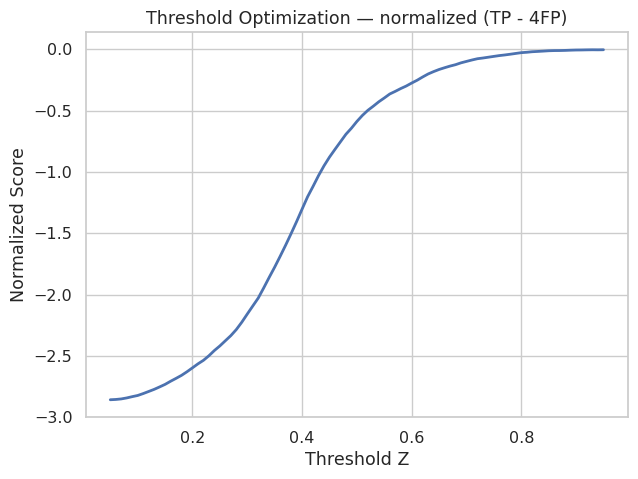

Confusion Matrix: TP=45, FP=14, TN=7908, FN=2033
Final normalized (TP - 4FP) on test = -0.001100
AUC on test = 0.750


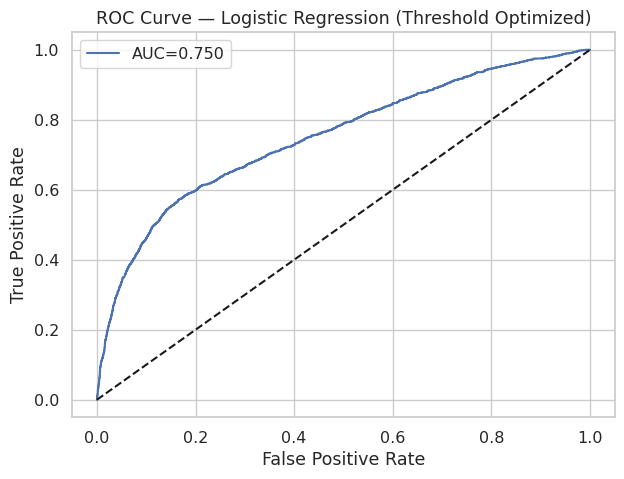

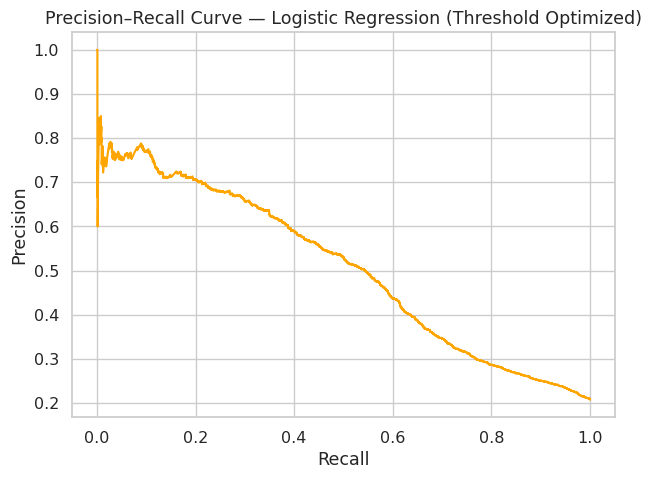

In [ ]:
# ===============================================================
# ⚙️ Logistic Regression (PCA) + Post-hoc Threshold Optimization
# ===============================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------------
# 1️⃣ Prepare Data
# ---------------------------------------------------------------
X = X_pca.copy().reset_index(drop=True)
y = y.reset_index(drop=True)

X_train, X_test = X.iloc[:20000, :], X.iloc[20000:, :]
y_train, y_test = y.iloc[:20000], y.iloc[20000:]

print(f"✅ Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# ---------------------------------------------------------------
# 2️⃣ Updated Hyperparameter Grid
# ---------------------------------------------------------------
param_grid = {
    "penalty": ["elasticnet"],
    "C": [0.01, 0.05, 0.1],
    "l1_ratio": [0.0, 0.1, 0.2],
    "solver": ["saga"],
    "max_iter": [3000],
    "class_weight": ["balanced"]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ---------------------------------------------------------------
# 3️⃣ Grid Search (based on AUC, stable)
# ---------------------------------------------------------------
grid = GridSearchCV(
    LogisticRegression(),
    param_grid=param_grid,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

print("✅ Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_

# ---------------------------------------------------------------
# 🧠 Step 2: Optimize threshold Z (TP - 4*FP rule, stabilized)
# ---------------------------------------------------------------
y_prob_train = best_model.predict_proba(X_train)[:, 1]
thresholds = np.linspace(0.05, 0.95, 91)
scores = []

for t in thresholds:
    y_pred = (y_prob_train >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
    if tp + fp == 0:      # all predicted 0 → penalize slightly
        scores.append(-1e6)
        continue
    score = (tp - 4 * fp) / len(y_train)
    scores.append(score)

best_threshold = thresholds[np.argmax(scores)]
print(f"🚀 Optimal threshold (Z) = {best_threshold:.3f}")
print(f"Max normalized (TP - 4FP) = {max(scores):.6f}")

plt.figure(figsize=(7,5))
plt.plot(thresholds, scores, lw=2)
plt.title("Threshold Optimization — normalized (TP - 4FP)")
plt.xlabel("Threshold Z")
plt.ylabel("Normalized Score")
plt.show()

# Evaluate on test set
y_prob_test = best_model.predict_proba(X_test)[:, 1]
y_pred_test = (y_prob_test >= best_threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

print(f"Confusion Matrix: TP={tp}, FP={fp}, TN={tn}, FN={fn}")
print(f"Final normalized (TP - 4FP) on test = {(tp - 4*fp)/len(y_test):.6f}")
print(f"AUC on test = {roc_auc_score(y_test, y_prob_test):.3f}")


# ---------------------------------------------------------------
# 6️⃣ Optional: Visuals
# ---------------------------------------------------------------
from sklearn.metrics import roc_curve, precision_recall_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob_test)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC={roc_auc:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression (Threshold Optimized)")
plt.legend()
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_prob_test)
plt.figure(figsize=(7,5))
plt.plot(recall, precision, color="orange")
plt.title("Precision–Recall Curve — Logistic Regression (Threshold Optimized)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()



=== 🧠 Model Evaluation Metrics (Baseline Threshold 0.5) ===
Accuracy: 0.762
AUC: 0.750
F1 Score: 0.509
MSE: 0.185 | RMSE: 0.430
Log Loss: 0.556

Classification Report (Threshold = 0.5):
               precision    recall  f1-score   support

           0      0.883     0.806     0.843      7922
           1      0.445     0.593     0.509      2078

    accuracy                          0.762     10000
   macro avg      0.664     0.700     0.676     10000
weighted avg      0.792     0.762     0.773     10000



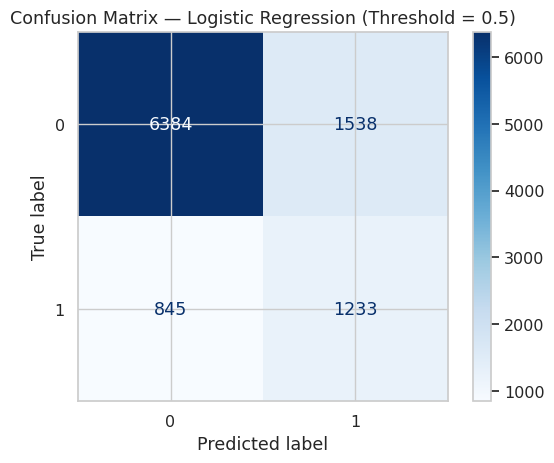

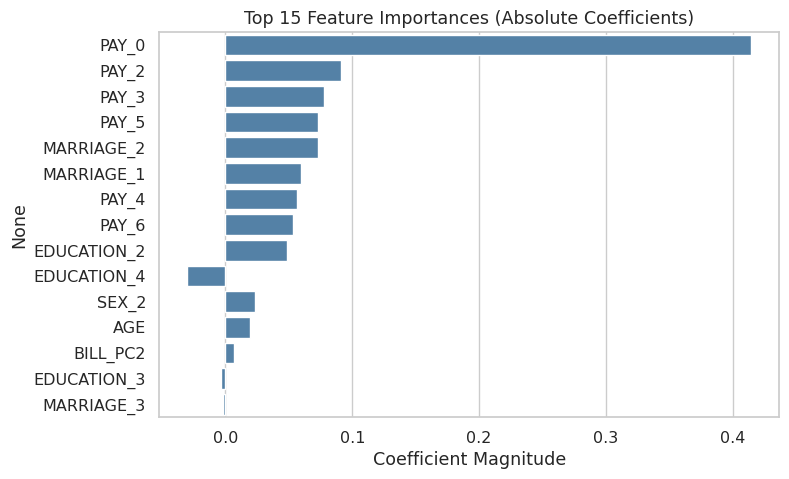

In [ ]:
from sklearn.metrics import (
    accuracy_score, f1_score, mean_squared_error, log_loss, classification_report
)

# Evaluate model (baseline threshold 0.5)
y_pred_base = (y_prob_test >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred_base)
auc_score = roc_auc_score(y_test, y_prob_test)
f1 = f1_score(y_test, y_pred_base)
mse = mean_squared_error(y_test, y_prob_test)
rmse = np.sqrt(mse)
ll = log_loss(y_test, y_prob_test)

print("\n=== 🧠 Model Evaluation Metrics (Baseline Threshold 0.5) ===")
print(f"Accuracy: {acc:.3f}")
print(f"AUC: {auc_score:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"MSE: {mse:.3f} | RMSE: {rmse:.3f}")
print(f"Log Loss: {ll:.3f}")

print("\nClassification Report (Threshold = 0.5):\n",
      classification_report(y_test, y_pred_base, digits=3))
from sklearn.metrics import ConfusionMatrixDisplay

cm_base = confusion_matrix(y_test, y_pred_base)
ConfusionMatrixDisplay(cm_base).plot(cmap="Blues")
plt.title("Confusion Matrix — Logistic Regression (Threshold = 0.5)")
plt.show()
coef = pd.Series(best_model.coef_.ravel(), index=X.columns).sort_values(key=abs, ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=coef.values[:15], y=coef.index[:15], orient="h", color="steelblue")
plt.title("Top 15 Feature Importances (Absolute Coefficients)")
plt.xlabel("Coefficient Magnitude")
plt.show()


## The new model behaves almost the same as the previous one.

## Smaller C and low l1_ratio didn’t change much, the model is not overfitted.

✅ Train shape: (24000, 23), Test shape: (6000, 23)
Fitting 5 folds for each of 9 candidates, totalling 45 fits
✅ Best Parameters: {'C': 0.01, 'class_weight': 'balanced', 'l1_ratio': 0.0, 'max_iter': 3000, 'penalty': 'elasticnet', 'solver': 'saga'}

=== 🧠 Model Evaluation Metrics ===
Accuracy: 0.706
AUC: 0.722
F1 Score: 0.472
MSE: 0.204 | RMSE: 0.452
Log Loss: 0.602

Classification Report:
               precision    recall  f1-score   support

           0      0.868     0.736     0.796      4687
           1      0.389     0.601     0.472      1313

    accuracy                          0.706      6000
   macro avg      0.629     0.668     0.634      6000
weighted avg      0.763     0.706     0.725      6000



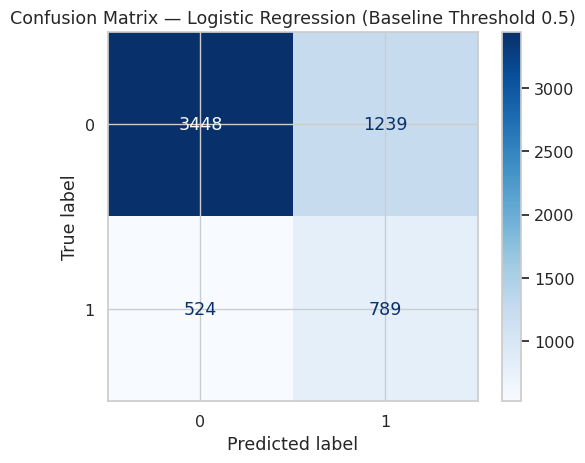


🚀 Optimal threshold (Z) = 0.950
Max normalized (TP - 4FP) = -0.002333


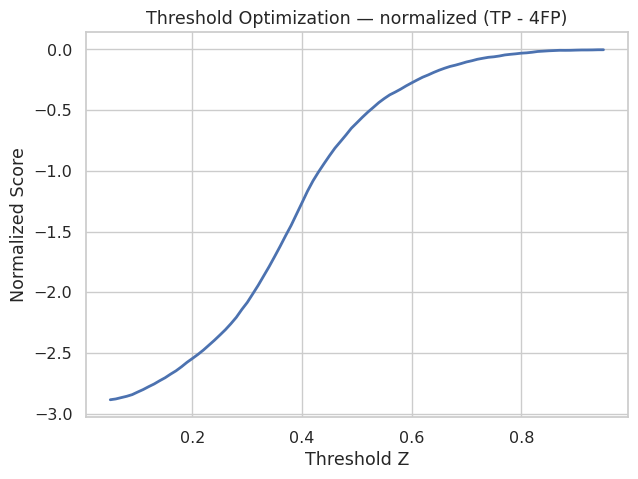

Confusion Matrix (Optimized): TP=27, FP=14, TN=4673, FN=1286
Final normalized (TP - 4FP) on test = -0.004833
AUC on test = 0.722


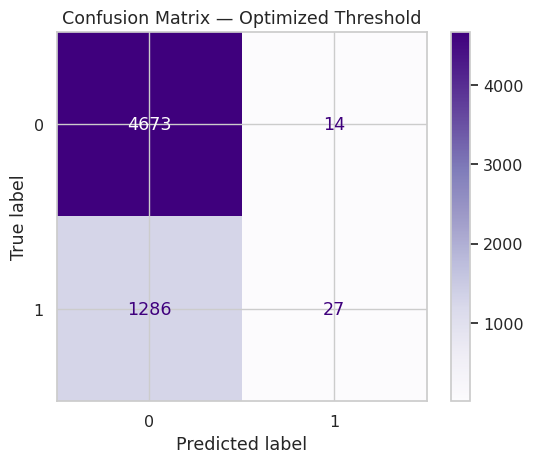

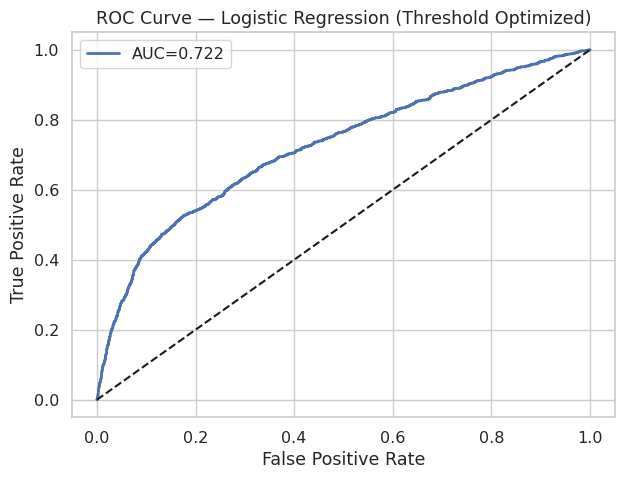

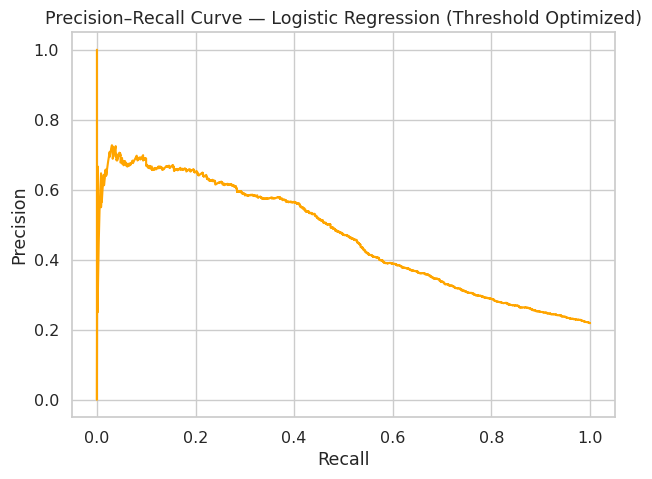

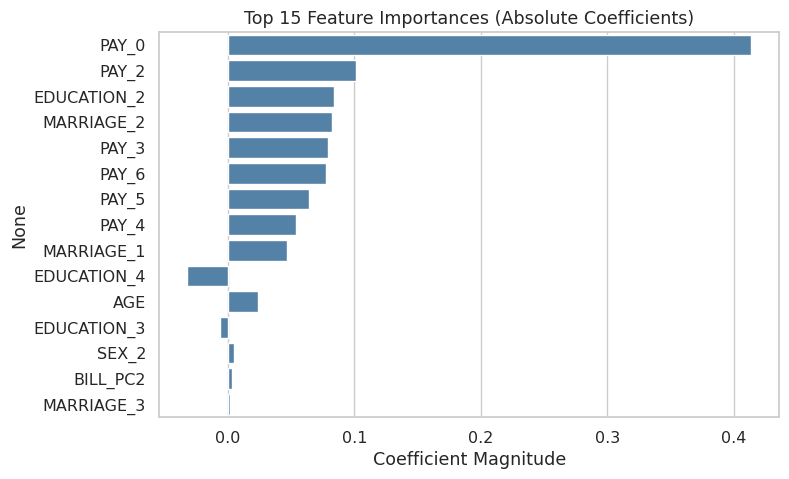

In [ ]:
# ===============================================================
# ⚙️ Logistic Regression (PCA) + Post-hoc Threshold Optimization
# ===============================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, precision_recall_curve,
    accuracy_score, f1_score, mean_squared_error, log_loss,
    roc_auc_score, classification_report
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------------
# 1️⃣ Prepare Data — New Split
# ---------------------------------------------------------------
X = X_pca.copy().reset_index(drop=True)
y = y.reset_index(drop=True)

# ✅ Train = last 24000 rows | Test = first 6000 rows
X_train, X_test = X.iloc[-24000:, :], X.iloc[:6000, :]
y_train, y_test = y.iloc[-24000:], y.iloc[:6000]

print(f"✅ Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# ---------------------------------------------------------------
# 2️⃣ Updated Hyperparameter Grid
# ---------------------------------------------------------------
param_grid = {
    "penalty": ["elasticnet"],
    "C": [0.01, 0.05, 0.1],
    "l1_ratio": [0.0, 0.1, 0.2],
    "solver": ["saga"],
    "max_iter": [3000],
    "class_weight": ["balanced"]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ---------------------------------------------------------------
# 3️⃣ Grid Search (based on AUC)
# ---------------------------------------------------------------
grid = GridSearchCV(
    LogisticRegression(),
    param_grid=param_grid,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

print("✅ Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_

# ---------------------------------------------------------------
# 4️⃣ Base Model Evaluation (before threshold tuning)
# ---------------------------------------------------------------
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)
f1 = f1_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_prob)
rmse = np.sqrt(mse)
ll = log_loss(y_test, y_prob)

print("\n=== 🧠 Model Evaluation Metrics ===")
print(f"Accuracy: {acc:.3f}")
print(f"AUC: {auc_score:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"MSE: {mse:.3f} | RMSE: {rmse:.3f}")
print(f"Log Loss: {ll:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Confusion Matrix — Logistic Regression (Baseline Threshold 0.5)")
plt.show()

# ---------------------------------------------------------------
# 5️⃣ Threshold Optimization (TP - 4*FP rule)
# ---------------------------------------------------------------
y_prob_train = best_model.predict_proba(X_train)[:, 1]
thresholds = np.linspace(0.05, 0.95, 91)
scores = []

for t in thresholds:
    y_pred_t = (y_prob_train >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred_t).ravel()
    if tp + fp == 0:
        scores.append(-1e6)
        continue
    score = (tp - 4 * fp) / len(y_train)
    scores.append(score)

best_threshold = thresholds[np.argmax(scores)]
print(f"\n🚀 Optimal threshold (Z) = {best_threshold:.3f}")
print(f"Max normalized (TP - 4FP) = {max(scores):.6f}")

plt.figure(figsize=(7,5))
plt.plot(thresholds, scores, lw=2)
plt.title("Threshold Optimization — normalized (TP - 4FP)")
plt.xlabel("Threshold Z")
plt.ylabel("Normalized Score")
plt.show()

# Evaluate on test set using optimized threshold
y_pred_opt = (y_prob >= best_threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_opt).ravel()

print(f"Confusion Matrix (Optimized): TP={tp}, FP={fp}, TN={tn}, FN={fn}")
print(f"Final normalized (TP - 4FP) on test = {(tp - 4*fp)/len(y_test):.6f}")
print(f"AUC on test = {roc_auc_score(y_test, y_prob):.3f}")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_opt)).plot(cmap="Purples")
plt.title("Confusion Matrix — Optimized Threshold")
plt.show()

# ---------------------------------------------------------------
# 6️⃣ ROC and Precision–Recall Curves
# ---------------------------------------------------------------
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, lw=2, label=f"AUC={roc_auc:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression (Threshold Optimized)")
plt.legend()
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(7,5))
plt.plot(recall, precision, color="orange")
plt.title("Precision–Recall Curve — Logistic Regression (Threshold Optimized)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

# ---------------------------------------------------------------
# 7️⃣ Feature Importance (Top 15 coefficients)
# ---------------------------------------------------------------
coef = pd.Series(best_model.coef_.ravel(), index=X.columns).sort_values(key=abs, ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=coef.values[:15], y=coef.index[:15], orient="h", color="steelblue")
plt.title("Top 15 Feature Importances (Absolute Coefficients)")
plt.xlabel("Coefficient Magnitude")
plt.show()


## Train sample: Last 24,000 rows. Test sample: First 6,000 rows.
## Default class (1):
## Precision = 0.39 → many false alarms.
## Recall = 0.60 → catches 60% of defaults.
## Non-default class (0):
## Precision = 0.87 → very reliable for identifying safe loans.
## Recall = 0.74 → missed some good clients compared to before.
### Comparison

| Setting | Train Sample | Test Sample | Accuracy | AUC | F1 | Recall (Class 1) |
|:--------|:--------------|:-------------|:----------|:------|:------|:------------------|
| **Old** | First 20,000 | Last 10,000 | 0.762 | 0.750 | 0.509 | 0.59 |
| **New** | Last 24,000 | First 6,000 | 0.706 | 0.722 | 0.472 | 0.60 |

---

## Why the performance is worse than the previous train-test split: Explained
## The training data we used before may have more similar patterns compare to the test data than the new training data difference with the new test data, for example if this is time series dataset, then it might indicate some structural change between the test and train data, but for this case, it might be the scale of the difference between two splits is different, thus cacaused different representation degree of the training data on the test data.
## But one important thing is that, if we consider/assume that for credit default forecast, missing a positive case has higher influence than misclassify a negative case, we may can try the logit model under the optimize of : TN-4*FN, instead of TP-4*FP

✅ Train shape: (20000, 23), Test shape: (10000, 23)
Fitting 5 folds for each of 9 candidates, totalling 45 fits
✅ Best Parameters: {'C': 0.01, 'class_weight': 'balanced', 'l1_ratio': 0.0, 'max_iter': 3000, 'penalty': 'elasticnet', 'solver': 'saga'}

=== 🧠 Model Evaluation Metrics ===
Accuracy: 0.762
AUC: 0.750
F1 Score: 0.509
MSE: 0.185 | RMSE: 0.430
Log Loss: 0.556

Classification Report:
               precision    recall  f1-score   support

           0      0.883     0.806     0.843      7922
           1      0.445     0.593     0.509      2078

    accuracy                          0.762     10000
   macro avg      0.664     0.700     0.676     10000
weighted avg      0.792     0.762     0.773     10000



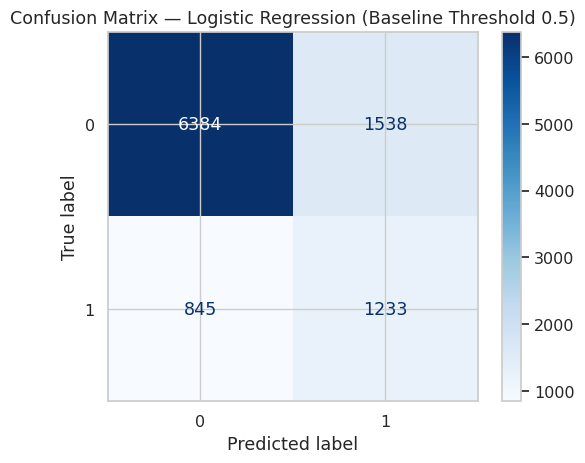


🚀 Optimal threshold (Z) = 0.510
Max normalized (TN - 4FN) = 0.240350


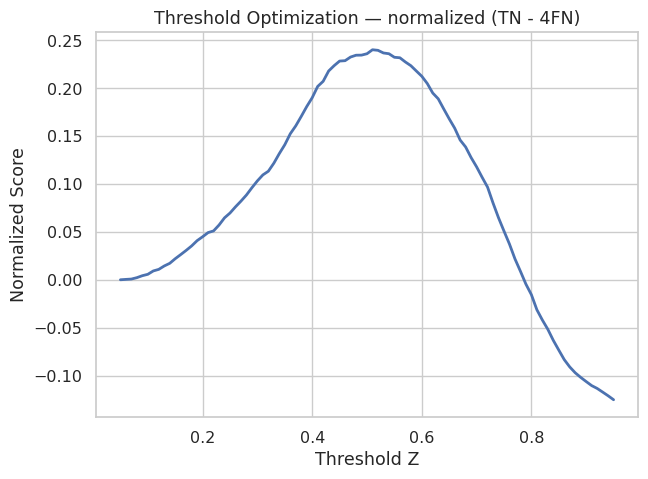

Confusion Matrix (Optimized): TP=1208, FP=1404, TN=6518, FN=870
Final normalized (TN - 4FN) on test = 0.303800
AUC on test = 0.750


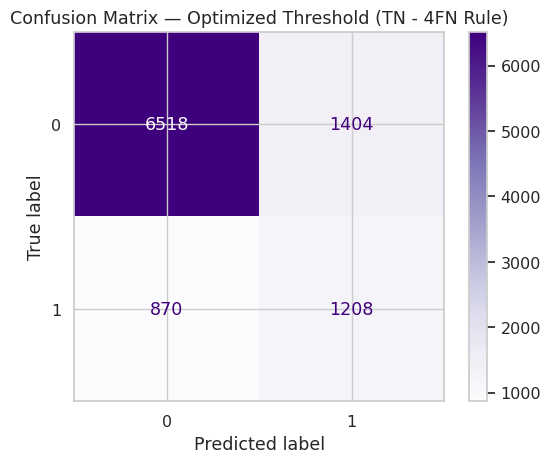

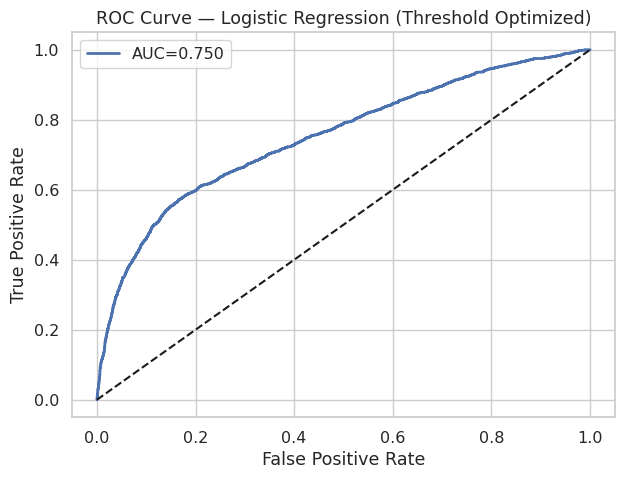

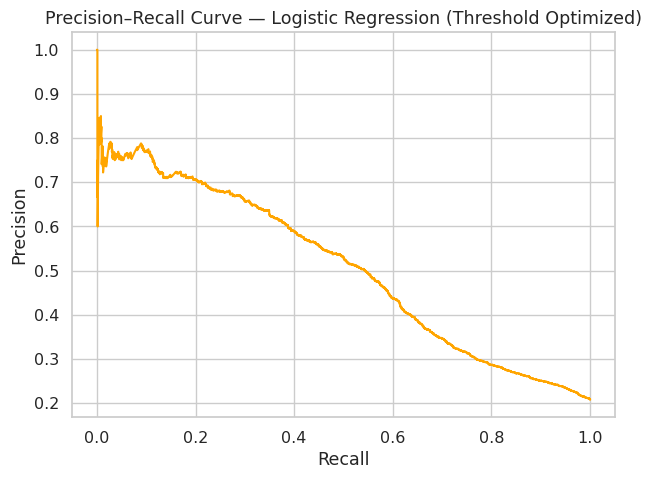

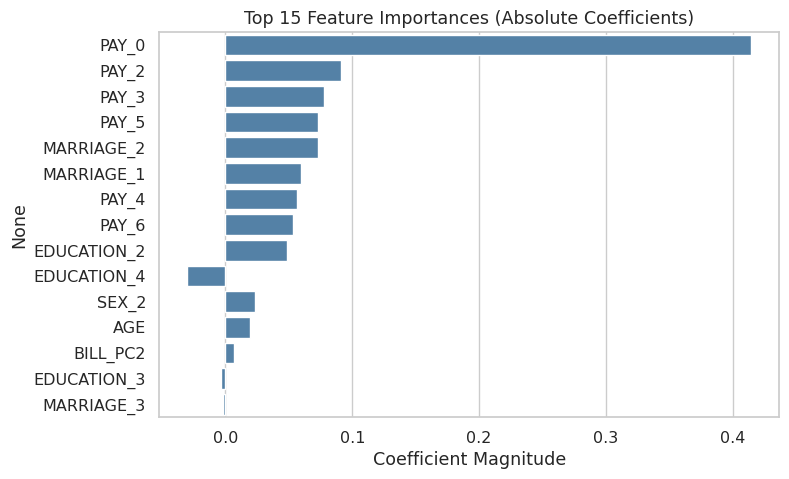

In [ ]:
# ===============================================================
# ⚙️ Logistic Regression (PCA) + Post-hoc Threshold Optimization (TN - 4*FN rule)
# ===============================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, precision_recall_curve,
    accuracy_score, f1_score, mean_squared_error, log_loss,
    roc_auc_score, classification_report
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------------
# 1️⃣ Prepare Data
# ---------------------------------------------------------------
X = X_pca.copy().reset_index(drop=True)
y = y.reset_index(drop=True)

X_train, X_test = X.iloc[:20000, :], X.iloc[20000:, :]
y_train, y_test = y.iloc[:20000], y.iloc[20000:]

print(f"✅ Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# ---------------------------------------------------------------
# 2️⃣ Updated Hyperparameter Grid
# ---------------------------------------------------------------
param_grid = {
    "penalty": ["elasticnet"],
    "C": [0.01, 0.05, 0.1],
    "l1_ratio": [0.0, 0.1, 0.2],
    "solver": ["saga"],
    "max_iter": [3000],
    "class_weight": ["balanced"]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ---------------------------------------------------------------
# 3️⃣ Grid Search (based on AUC)
# ---------------------------------------------------------------
grid = GridSearchCV(
    LogisticRegression(),
    param_grid=param_grid,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

print("✅ Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_

# ---------------------------------------------------------------
# 4️⃣ Base Model Evaluation (before threshold tuning)
# ---------------------------------------------------------------
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)
f1 = f1_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_prob)
rmse = np.sqrt(mse)
ll = log_loss(y_test, y_prob)

print("\n=== 🧠 Model Evaluation Metrics ===")
print(f"Accuracy: {acc:.3f}")
print(f"AUC: {auc_score:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"MSE: {mse:.3f} | RMSE: {rmse:.3f}")
print(f"Log Loss: {ll:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap="Blues")
plt.title("Confusion Matrix — Logistic Regression (Baseline Threshold 0.5)")
plt.show()

# ---------------------------------------------------------------
# 5️⃣ Threshold Optimization (TN - 4*FN rule)
# ---------------------------------------------------------------
y_prob_train = best_model.predict_proba(X_train)[:, 1]
thresholds = np.linspace(0.05, 0.95, 91)
scores = []

for t in thresholds:
    y_pred_t = (y_prob_train >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred_t).ravel()
    if tn + fn == 0:
        scores.append(-1e6)
        continue
    score = (tn - 4 * fn) / len(y_train)
    scores.append(score)

best_threshold = thresholds[np.argmax(scores)]
print(f"\n🚀 Optimal threshold (Z) = {best_threshold:.3f}")
print(f"Max normalized (TN - 4FN) = {max(scores):.6f}")

plt.figure(figsize=(7,5))
plt.plot(thresholds, scores, lw=2)
plt.title("Threshold Optimization — normalized (TN - 4FN)")
plt.xlabel("Threshold Z")
plt.ylabel("Normalized Score")
plt.show()

# Evaluate on test set using optimized threshold
y_pred_opt = (y_prob >= best_threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_opt).ravel()

print(f"Confusion Matrix (Optimized): TP={tp}, FP={fp}, TN={tn}, FN={fn}")
print(f"Final normalized (TN - 4FN) on test = {(tn - 4*fn)/len(y_test):.6f}")
print(f"AUC on test = {roc_auc_score(y_test, y_prob):.3f}")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_opt)).plot(cmap="Purples")
plt.title("Confusion Matrix — Optimized Threshold (TN - 4FN Rule)")
plt.show()

# ---------------------------------------------------------------
# 6️⃣ ROC and Precision–Recall Curves
# ---------------------------------------------------------------
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, lw=2, label=f"AUC={roc_auc:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression (Threshold Optimized)")
plt.legend()
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(7,5))
plt.plot(recall, precision, color="orange")
plt.title("Precision–Recall Curve — Logistic Regression (Threshold Optimized)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

# ---------------------------------------------------------------
# 7️⃣ Feature Importance (Top 15 coefficients)
# ---------------------------------------------------------------
coef = pd.Series(best_model.coef_.ravel(), index=X.columns).sort_values(key=abs, ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=coef.values[:15], y=coef.index[:15], orient="h", color="steelblue")
plt.title("Top 15 Feature Importances (Absolute Coefficients)")
plt.xlabel("Coefficient Magnitude")
plt.show()


## Slightly improved accuracy & performance
## TN − 4FN made the model more balanced — it no longer avoids approving good clients too much.
## TP − 4FP was too conservative, with an unrealistically high threshold (≈ 0.95).
## TN − 4FN gives a clearer optimal point and smoother trade-off curve.